In [49]:
!pip install matplotlib 
!pip install sweetviz
!pip install geopandas
!pip install squarify



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [26]:
df_musée_clean='/Users/karimahallou/code/offre_culturelle/notebook/data/museecleaned.csv'
df_freq='/Users/karimahallou/code/offre_culturelle/notebook/data/frequentation-des-musees-de-france.csv'

In [51]:
import os
import warnings

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects




In [145]:
df_musee = pd.read_csv(MUSEE_PATH, sep="|", dtype=str, header=0)
df_musee.head(2)

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,Centre de secours principal,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,museepompiers.com/,04 72 17 54 54,...,"Armes, Uniformes, Véhicules pompiers, Archives...",NaN,NaN,NaN,NaN,NaN,SPR8400131,1971,2025-07-25,"45.790491, 4.797411"
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,NaN,67140,Barr,Bas-Rhin,Grand Est,www.musee-foliemarco.com,03 88 08 94 72,...,"Arts décoratifs : Mobilier, Objets d'art",NaN,NaN,Demeure patricienne d'architecture française d...,Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,PA00084599;IA00115077,1960,2025-07-25,"48.410166, 7.451102"


In [146]:
df_musee.describe

<bound method NDFrame.describe of      Identifiant                                       Nom_officiel  \
0          M1128                 musée des sapeurs-pompiers de Lyon   
1          M0001                            musée de la Folie Marco   
2          M0002                                musée de La Poterie   
3          M0003  musée du Pays de Hanau - histoire et vies d’un...   
4          M0004                                     musée alsacien   
...          ...                                                ...   
1217       M1220                  musée de la Bataille de Fromelles   
1218       M1221                    musée & jardins Cécile Sabourdy   
1219       M1222                       musée de la Création Franche   
1220       M1223     Musée du pays de Buch et du bassin d’Arcachon    
1221       M1224                  musée de la Grande Loge de France   

                                          Adresse  \
0                         358 avenue de Champagne   
1      

In [147]:
df_musee.info

<bound method DataFrame.info of      Identifiant                                       Nom_officiel  \
0          M1128                 musée des sapeurs-pompiers de Lyon   
1          M0001                            musée de la Folie Marco   
2          M0002                                musée de La Poterie   
3          M0003  musée du Pays de Hanau - histoire et vies d’un...   
4          M0004                                     musée alsacien   
...          ...                                                ...   
1217       M1220                  musée de la Bataille de Fromelles   
1218       M1221                    musée & jardins Cécile Sabourdy   
1219       M1222                       musée de la Création Franche   
1220       M1223     Musée du pays de Buch et du bassin d’Arcachon    
1221       M1224                  musée de la Grande Loge de France   

                                          Adresse  \
0                         358 avenue de Champagne   
1        

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11

def load_and_analyze_data(csv_path):
    """
    Charge et analyse le fichier CSV des musées
    """
    try:
        # Lecture du CSV avec différents encodages possibles
        encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
        df = None
        
        for encoding in encodings:
            try:
                df = pd.read_csv(csv_path, encoding=encoding)
                print(f"✓ Fichier chargé avec l'encodage {encoding}")
                break
            except UnicodeDecodeError:
                continue
        
        if df is None:
            raise Exception("Impossible de lire le fichier avec les encodages testés")
        
        print(f"✓ Données chargées: {len(df)} musées")
        print(f"✓ Colonnes disponibles: {list(df.columns)}")
        
        return df
    
    except Exception as e:
        print(f"❌ Erreur lors du chargement: {e}")
        return None

def identify_region_column(df):
    """
    Identifie la colonne région (optimisé pour votre structure de données)
    """
    # Votre fichier a une colonne 'Region'
    if 'Region' in df.columns:
        return 'Region'
    
    # Fallback pour d'autres variations possibles
    possible_region_cols = [
        'region', 'région', 'Région', 'REGION',
        'reg', 'REG', 'nouvelle_region', 'nouvelle_région'
    ]
    
    for col in possible_region_cols:
        if col in df.columns:
            return col
    
    return None

def clean_region_names(df, region_col):
    """
    Nettoie et standardise les noms de région
    """
    # Standardisation des noms de régions françaises
    region_mapping = {
        # Nouvelle-Aquitaine
        'nouvelle-aquitaine': 'Nouvelle-Aquitaine',
        'nouvelle aquitaine': 'Nouvelle-Aquitaine',
        'poitou-charentes': 'Nouvelle-Aquitaine',
        'limousin': 'Nouvelle-Aquitaine',
        'aquitaine': 'Nouvelle-Aquitaine',
        
        # Occitanie
        'occitanie': 'Occitanie',
        'languedoc-roussillon': 'Occitanie',
        'midi-pyrénées': 'Occitanie',
        'midi-pyrenees': 'Occitanie',
        
        # Auvergne-Rhône-Alpes
        'auvergne-rhône-alpes': 'Auvergne-Rhône-Alpes',
        'auvergne-rhone-alpes': 'Auvergne-Rhône-Alpes',
        'rhône-alpes': 'Auvergne-Rhône-Alpes',
        'rhone-alpes': 'Auvergne-Rhône-Alpes',
        'auvergne': 'Auvergne-Rhône-Alpes',
        
        # Hauts-de-France
        'hauts-de-france': 'Hauts-de-France',
        'nord-pas-de-calais': 'Hauts-de-France',
        'picardie': 'Hauts-de-France',
        
        # Grand Est
        'grand est': 'Grand Est',
        'grand-est': 'Grand Est',
        'alsace': 'Grand Est',
        'lorraine': 'Grand Est',
        'champagne-ardenne': 'Grand Est',
        
        # Autres régions
        'île-de-france': 'Île-de-France',
        'ile-de-france': 'Île-de-France',
        'pays de la loire': 'Pays de la Loire',
        'pays-de-la-loire': 'Pays de la Loire',
        'centre-val de loire': 'Centre-Val de Loire',
        'centre': 'Centre-Val de Loire',
        'bourgogne-franche-comté': 'Bourgogne-Franche-Comté',
        'bourgogne-franche-comte': 'Bourgogne-Franche-Comté',
        'bourgogne': 'Bourgogne-Franche-Comté',
        'franche-comté': 'Bourgogne-Franche-Comté',
        'franche-comte': 'Bourgogne-Franche-Comté',
        'normandie': 'Normandie',
        'basse-normandie': 'Normandie',
        'haute-normandie': 'Normandie',
        'bretagne': 'Bretagne',
        'provence-alpes-côte d\'azur': 'Provence-Alpes-Côte d\'Azur',
        'provence-alpes-cote d\'azur': 'Provence-Alpes-Côte d\'Azur',
        'paca': 'Provence-Alpes-Côte d\'Azur',
        'corse': 'Corse',
        'guadeloupe': 'Guadeloupe',
        'martinique': 'Martinique',
        'guyane': 'Guyane',
        'réunion': 'La Réunion',
        'la réunion': 'La Réunion',
        'mayotte': 'Mayotte'
    }
    
    # Application du mapping
    df[region_col] = df[region_col].astype(str).str.lower().str.strip()
    df[region_col] = df[region_col].map(region_mapping).fillna(df[region_col].str.title())
    
    return df

def create_regional_stats(df, region_col):
    """
    Crée les statistiques par région avec analyses enrichies
    """
    # Comptage par région
    region_counts = df[region_col].value_counts()
    
    # Création d'un DataFrame avec les statistiques de base
    stats_df = pd.DataFrame({
        'Région': region_counts.index,
        'Nombre_musées': region_counts.values
    })
    
    # Calcul de la densité relative (pourcentage)
    stats_df['Pourcentage'] = (stats_df['Nombre_musées'] / stats_df['Nombre_musées'].sum()) * 100
    
    # Analyses enrichies si les colonnes sont disponibles
    if 'Categorie' in df.columns:
        # Analyse par catégorie de musée
        category_stats = df.groupby([region_col, 'Categorie']).size().unstack(fill_value=0)
        stats_df['Diversité_catégories'] = df.groupby(region_col)['Categorie'].nunique()
    
    if 'Domaine_thematique' in df.columns:
        # Diversité thématique
        stats_df['Diversité_thématique'] = df.groupby(region_col)['Domaine_thematique'].nunique()
    
    if 'Protection_batiment' in df.columns:
        # Patrimoine protégé
        protected = df[df['Protection_batiment'].notna()]
        if len(protected) > 0:
            protection_counts = protected.groupby(region_col).size()
            stats_df['Patrimoine_protégé'] = stats_df['Région'].map(protection_counts).fillna(0).astype(int)
    
    # Ajout d'une catégorie d'offre
    stats_df['Catégorie_offre'] = pd.cut(
        stats_df['Nombre_musées'], 
        bins=[0, 30, 80, 150, 300, float('inf')],
        labels=['Très faible', 'Faible', 'Moyenne', 'Forte', 'Très forte'],
        include_lowest=True
    )
    
    return stats_df.sort_values('Nombre_musées', ascending=False)

def create_heatmap_chart(stats_df, title="Offre des musées en France par région"):
    """
    Crée un graphique en barres avec effet thermique
    """
    # Tri des données
    stats_df_sorted = stats_df.sort_values('Nombre_musées', ascending=True)
    
    # Création de la figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
    
    # === GRAPHIQUE 1: Barres horizontales avec gradient ===
    # Création d'un gradient de couleurs
    colors = plt.cm.YlOrRd(np.linspace(0.3, 1, len(stats_df_sorted)))
    
    bars = ax1.barh(stats_df_sorted['Région'], stats_df_sorted['Nombre_musées'], 
                    color=colors, edgecolor='white', linewidth=0.8)
    
    # Ajout des valeurs sur les barres
    for i, (bar, value) in enumerate(zip(bars, stats_df_sorted['Nombre_musées'])):
        ax1.text(value + max(stats_df_sorted['Nombre_musées']) * 0.01, 
                bar.get_y() + bar.get_height()/2, 
                f'{value:,}', 
                va='center', ha='left', fontweight='bold', fontsize=10)
    
    ax1.set_title('Nombre de musées par région', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Nombre de musées', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # === GRAPHIQUE 2: Heatmap matricielle ===
    # Préparation des données pour la heatmap
    n_cols = 4  # Nombre de colonnes pour la matrice
    n_rows = int(np.ceil(len(stats_df) / n_cols))
    
    # Création d'une matrice
    heatmap_data = np.zeros((n_rows, n_cols))
    region_labels = np.full((n_rows, n_cols), '', dtype=object)
    
    for i, (_, row) in enumerate(stats_df.iterrows()):
        row_idx = i // n_cols
        col_idx = i % n_cols
        heatmap_data[row_idx, col_idx] = row['Nombre_musées']
        region_labels[row_idx, col_idx] = f"{row['Région']}\n{row['Nombre_musées']}"
    
    # Création de la heatmap
    im = ax2.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
    
    # Ajout des labels
    for i in range(n_rows):
        for j in range(n_cols):
            if region_labels[i, j]:
                text_color = 'white' if heatmap_data[i, j] > np.max(heatmap_data) * 0.6 else 'black'
                ax2.text(j, i, region_labels[i, j], 
                        ha='center', va='center', 
                        fontsize=9, fontweight='bold', color=text_color)
    
    ax2.set_title('Répartition thermique des musées', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # Barre de couleur
    cbar = plt.colorbar(im, ax=ax2, shrink=0.8)
    cbar.set_label('Nombre de musées', rotation=270, labelpad=20, fontsize=12)
    
    # Titre général
    fig.suptitle(title, fontsize=20, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

def create_summary_table(stats_df, df, region_col):
    """
    Crée un tableau récapitulatif enrichi avec vos données
    """
    # Top 10 des régions
    top_regions = stats_df.head(10)
    
    print("\n" + "="*70)
    print("🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION")
    print("="*70)
    
    print(f"\n📊 STATISTIQUES GÉNÉRALES:")
    print(f"   🏛️  Total des musées: {stats_df['Nombre_musées'].sum():,}")
    print(f"   📍 Régions analysées: {len(stats_df)}")
    print(f"   📈 Moyenne par région: {stats_df['Nombre_musées'].mean():.1f} musées")
    print(f"   📉 Médiane par région: {stats_df['Nombre_musées'].median():.1f} musées")
    
    # Analyses enrichies
    if 'Categorie' in df.columns:
        categories = df['Categorie'].value_counts().head(3)
        print(f"\n🎯 TOP 3 CATÉGORIES DE MUSÉES:")
        for i, (cat, count) in enumerate(categories.items(), 1):
            print(f"   {i}. {cat}: {count} musées")
    
    if 'Domaine_thematique' in df.columns:
        themes = df['Domaine_thematique'].value_counts().head(3)
        print(f"\n🎨 TOP 3 DOMAINES THÉMATIQUES:")
        for i, (theme, count) in enumerate(themes.items(), 1):
            print(f"   {i}. {theme}: {count} musées")
    
    print(f"\n🏆 TOP 10 DES RÉGIONS:")
    print("-" * 55)
    for i, (_, row) in enumerate(top_regions.iterrows(), 1):
        diversity_info = ""
        if 'Diversité_catégories' in row:
            diversity_info = f" • {int(row['Diversité_catégories'])} catégories"
        if 'Patrimoine_protégé' in row and row['Patrimoine_protégé'] > 0:
            diversity_info += f" • {int(row['Patrimoine_protégé'])} protégés"
        
        print(f"{i:2d}. {row['Région']:<25} {row['Nombre_musées']:>4} musées ({row['Pourcentage']:>5.1f}%){diversity_info}")
    
    print(f"\n📊 RÉPARTITION PAR CATÉGORIE D'OFFRE:")
    print("-" * 40)
    category_counts = stats_df['Catégorie_offre'].value_counts()
    for category, count in category_counts.items():
        regions_in_cat = stats_df[stats_df['Catégorie_offre'] == category]['Région'].tolist()
        print(f"   {category:<12} : {count:>2} région(s)")
        if count <= 3:  # Afficher les régions si peu nombreuses
            print(f"      → {', '.join(regions_in_cat)}")
    
    # Analyse géographique
    print(f"\n🗺️  RÉPARTITION GÉOGRAPHIQUE:")
    print("-" * 30)
    dom_tom = ['Guadeloupe', 'Martinique', 'Guyane', 'La Réunion', 'Mayotte']
    dom_tom_count = stats_df[stats_df['Région'].isin(dom_tom)]['Nombre_musées'].sum()
    metropole_count = stats_df[~stats_df['Région'].isin(dom_tom)]['Nombre_musées'].sum()
    
    print(f"   France métropolitaine: {metropole_count:,} musées ({metropole_count/(metropole_count+dom_tom_count)*100:.1f}%)")
    if dom_tom_count > 0:
        print(f"   Outre-mer: {dom_tom_count:,} musées ({dom_tom_count/(metropole_count+dom_tom_count)*100:.1f}%)")
    
    return top_regions

def analyze_museums_by_region(csv_path):
    """
    Fonction principale d'analyse
    """
    print("🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION")
    print("=" * 55)
    
    # Chargement des données
    df = load_and_analyze_data(csv_path)
    if df is None:
        return None, None
    
    # Identification de la colonne région
    region_col = identify_region_column(df)
    if region_col is None:
        print("\n❌ Colonne région non trouvée automatiquement.")
        print("Colonnes disponibles:", list(df.columns))
        region_col = input("Veuillez indiquer le nom de la colonne région: ")
    else:
        print(f"✓ Colonne région identifiée: '{region_col}'")
    
    # Nettoyage des noms de région
    df = clean_region_names(df, region_col)
    
    # Création des statistiques
    stats_df = create_regional_stats(df, region_col)
    
    # Création des visualisations
    fig, axes = create_heatmap_chart(stats_df)
    
    # Tableau récapitulatif
    summary = create_summary_table(stats_df, df, region_col)
    
    # Sauvegarde optionnelle des résultats
    try:
        stats_df.to_csv('analyse_musees_regions.csv', index=False, encoding='utf-8')
        print(f"\n💾 Résultats sauvegardés dans 'analyse_musees_regions.csv'")
    except Exception as e:
        print(f"\n⚠️  Impossible de sauvegarder: {e}")
    
    plt.show()
    
    return stats_df, fig

# Instructions d'utilisation spécifiques à votre fichier
def print_usage():
    """
    Affiche les instructions d'utilisation pour votre fichier CSV
    """
    print("\n" + "="*70)
    print("📋 INSTRUCTIONS POUR VOTRE FICHIER CSV NETTOYÉ")
    print("="*70)
    print("✅ Votre fichier contient les colonnes suivantes :")
    expected_columns = [
        'Identifiant', 'Nom_officiel', 'Adresse', 'Code_postal', 'Ville', 
        'Departement', 'Region', 'Coordonnees', 'Categorie', 'Domaine_thematique',
        'Themes', 'Protection_batiment', 'Protection_espace', 'URL', 'Date_de_mise_a_jour'
    ]
    for i, col in enumerate(expected_columns, 1):
        icon = "🏛️" if col == 'Region' else "📄"
        print(f"   {icon} {i:2d}. {col}")
    
    print(f"\n🎯 ANALYSES GÉNÉRÉES :")
    print("   📊 Carte thermique par région (colonne 'Region')")
    print("   🎨 Analyse par catégorie de musée (colonne 'Categorie')")
    print("   🏛️ Diversité thématique (colonne 'Domaine_thematique')")
    print("   🏰 Patrimoine protégé (colonne 'Protection_batiment')")
    
    print(f"\n🚀 UTILISATION :")
    print("   1. Placez votre fichier CSV dans le dossier du script")
    print("   2. Exécutez: stats, fig = analyze_museums_by_region('votre_fichier.csv')")
    print("   3. Consultez les graphiques et le rapport détaillé")
    
    print(f"\n💡 EXEMPLE :")
    print("   stats, fig = analyze_museums_by_region('musees_france_clean.csv')")

# Affichage des instructions
print_usage()

# Exemple d'utilisation (décommentez la ligne suivante avec votre fichier)
# stats, fig = analyze_museums_by_region('votre_fichier.csv')


📋 INSTRUCTIONS POUR VOTRE FICHIER CSV NETTOYÉ
✅ Votre fichier contient les colonnes suivantes :
   📄  1. Identifiant
   📄  2. Nom_officiel
   📄  3. Adresse
   📄  4. Code_postal
   📄  5. Ville
   📄  6. Departement
   🏛️  7. Region
   📄  8. Coordonnees
   📄  9. Categorie
   📄 10. Domaine_thematique
   📄 11. Themes
   📄 12. Protection_batiment
   📄 13. Protection_espace
   📄 14. URL
   📄 15. Date_de_mise_a_jour

🎯 ANALYSES GÉNÉRÉES :
   📊 Carte thermique par région (colonne 'Region')
   🎨 Analyse par catégorie de musée (colonne 'Categorie')
   🏛️ Diversité thématique (colonne 'Domaine_thematique')
   🏰 Patrimoine protégé (colonne 'Protection_batiment')

🚀 UTILISATION :
   1. Placez votre fichier CSV dans le dossier du script
   2. Exécutez: stats, fig = analyze_museums_by_region('votre_fichier.csv')
   3. Consultez les graphiques et le rapport détaillé

💡 EXEMPLE :
   stats, fig = analyze_museums_by_region('musees_france_clean.csv')


In [ ]:
# Appelez directement la fonction avec votre fichier
stats, fig = analyze_museums_by_region('museecleaned.csv') 

🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION
❌ Erreur lors du chargement: [Errno 2] No such file or directory: 'museecleaned.csv'


In [148]:
df_musee.shape

(1222, 24)

In [149]:
df_musee.isna().sum()

Identifiant              0
Nom_officiel             0
Adresse                 29
Lieu                   740
Code_postal              0
Ville                    0
Departement              0
Region                   0
URL                     87
Telephone               26
Categorie              704
Domaine_thematique      44
Histoire                52
Atout                   66
Themes                 145
Artiste                712
Personnage_phare       692
Interet                272
Protection_batiment    730
Protection_espace      445
Refmer                 443
Annee_creation         944
Date_de_mise_a_jour      0
Coordonnees              0
dtype: int64

In [150]:
print(df_freq.columns)


Index(['REF DU MUSEE;NOM DU MUSEE;ANNEE;REGION;VILLE;DATE APPELLATION;PAYANT;GRATUIT;TOTAL;NOTE;ID MUSEOFILE;DEPARTEMENT;OBSERVATIONS'], dtype='object')


In [27]:
#fichier avec frequentation des musées depuis 2000
import pandas as pd
import matplotlib.pyplot as plt 
import os
import seaborn as sns

freq_path='data/frequentation-des-musees-de-france.csv'
df_freq= pd.read_csv(freq_path, sep=";", dtype=str)


In [28]:
df_freq.describe

<bound method NDFrame.describe of       REF DU MUSEE                                       NOM DU MUSEE ANNEE  \
0          2915101                                   Musée de Morlaix  2001   
1          2923201                               Musée des Beaux-Arts  2001   
2          3528802         Musée d'Histoire de la Ville de Saint-Malo  2001   
3          3600601  Musée de la Chemiserie et de l'Elégance Masculine  2001   
4          1038705        Maison de l'Outil  et de la Pensée Ouvrière  2001   
...            ...                                                ...   ...   
24764      0608804                  Musée d'Art Naïf Anatole Jakovsky  2021   
24765      0608816            Musée Départemental des Arts Asiatiques  2021   
24766      1300107                        Muséum d'Histoire Naturelle  2021   
24767      1310001                  Musée des Alpilles Pierre de Brun  2021   
24768      8305001                               Musée des Beaux-Arts  2021   

                 

In [29]:
def rename_duplicates(cols):
    seen = {}
    new_cols = []
    for col in cols:
        if col not in seen:
            seen[col] = 1
            new_cols.append(col)
        else:
            seen[col] += 1
            new_cols.append(f"{col}_{seen[col]}")
    return new_cols

df.columns = rename_duplicates(df.columns)
print(df.columns.to_list())


['ref du musee', 'nom du musee', 'annee', 'region', 'ville', 'date appellation', 'payant', 'gratuit', 'total', 'note', 'id museofile', 'departement', 'observations']


In [31]:
df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['visiteurs'] = pd.to_numeric(df['total'], errors='coerce')

In [32]:
# Charger la géométrie des régions françaises
url_regions = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"
gdf_regions = gpd.read_file(url_regions)
gdf_regions['nom'] = gdf_regions['nom'].str.strip().str.upper()


In [33]:

# Charger les données de fréquentation musées
df = pd.read_csv('data/frequentation-des-musees-de-france.csv', sep=";", dtype=str)

In [34]:
# Nettoyer colonnes dupliquées et noms colonnes
df = df.loc[:, ~df.columns.duplicated()]
df.columns = [col.strip().lower() for col in df.columns]


In [35]:

# Conversion colonnes nécessaires en numérique
df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['total'] = pd.to_numeric(df['total'], errors='coerce')

In [36]:

# Année la plus récente dans le dataset
annee_recente = int(df['annee'].max())
df_recent = df[df['annee'] == annee_recente].copy()


In [37]:

# Uniformiser noms régions pour merge
df_recent['region'] = df_recent['region'].str.strip().str.upper()

In [38]:
# Agréger fréquentation par région
agg_region = df_recent.groupby('region', as_index=False)['total'].sum()
agg_region.rename(columns={'total': 'visiteurs'}, inplace=True)

In [39]:
# Fusion géo + fréquentation
gdf_merged = gdf_regions.merge(agg_region, left_on='nom', right_on='region', how='left')
gdf_merged['visiteurs'] = gdf_merged['visiteurs'].fillna(0)

In [40]:
# Top 10 régions les plus visitées
top10 = gdf_merged.nlargest(10, 'visiteurs')

In [41]:
top10.head()

,code,nom,geometry,region,visiteurs
0,11,ÎLE-DE-FRANCE,"POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1...",ÎLE-DE-FRANCE,15880456.0
16,93,PROVENCE-ALPES-CÔTE D'AZUR,"MULTIPOLYGON (((6.94833 44.65482, 6.95451 44.6...",PROVENCE-ALPES-CÔTE D'AZUR,2182922.0
15,84,AUVERGNE-RHÔNE-ALPES,"POLYGON ((3.36135 44.97141, 3.35453 44.95482, ...",AUVERGNE-RHÔNE-ALPES,1946641.0
5,44,GRAND EST,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",GRAND EST,1757159.0
4,32,HAUTS-DE-FRANCE,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",HAUTS-DE-FRANCE,1678397.0


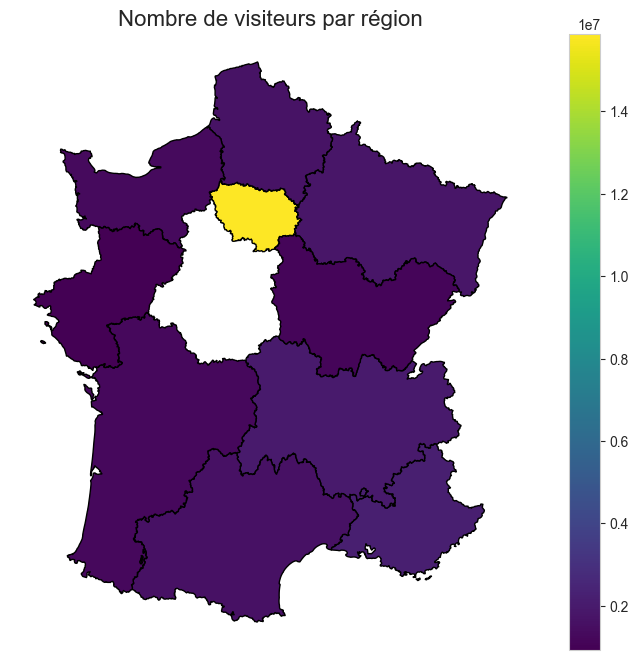

In [34]:

# Setup figure avec GridSpec (carte + bar chart)
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1], wspace=0.3)

<Figure size 1600x1000 with 0 Axes>

In [35]:
# Carte choroplèthe
ax_map = fig.add_subplot(gs[0])
gdf_merged.plot(
    column='visiteurs',
    cmap='YlGnBu',
    linewidth=0.8,
    edgecolor='0.8',
    ax=ax_map,
    legend=True,
    legend_kwds={'label': f'Visiteurs musées en {annee_recente}', 'orientation': 'vertical'}
)
ax_map.set_title(f'Fréquentation des musées par région en {annee_recente}', fontsize=18, fontweight='bold')
ax_map.axis('off')

(np.float64(-67.68808449444215),
 np.float64(61.71875744450715),
 np.float64(-25.01067703378675),
 np.float64(54.71231612529175))

In [36]:
# Labels sur la carte
for idx, row in gdf_merged.iterrows():
    if row['visiteurs'] > 0:
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        ax_map.text(
            x, y,
            f"{row['nom']}\n{row['visiteurs'] / 1_000_000:.2f} M",
            ha='center',
            fontsize=8,
            fontweight='bold',
            color='darkblue',
            path_effects=[path_effects.withStroke(linewidth=1, foreground="white")]
        )

In [37]:






# Bar chart horizontal du top 10
ax_bar = fig.add_subplot(gs[1])
ax_bar.barh(top10['nom'], top10['visiteurs'] / 1_000_000, color='steelblue')
ax_bar.invert_yaxis()
ax_bar.set_xlabel("Millions de visiteurs")
ax_bar.set_title("Top 10 régions les plus visitées", fontsize=16, fontweight='bold')

# Ajouter les valeurs à côté des barres
for i, val in enumerate(top10['visiteurs'] / 1_000_000):
    ax_bar.text(val + 0.05, i, f"{val:.2f} M", va='center', fontsize=9)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [42]:
import sys
sys.setrecursionlimit(1500)

import geopandas as gpd

url_regions = "https://france-geojson.gregoiredavid.fr/repo/regions.geojson"

gdf_regions = gpd.read_file(url_regions)
print(gdf_regions.head())

  code                      nom  \
0   11            Île-de-France   
1   24      Centre-Val de Loire   
2   27  Bourgogne-Franche-Comté   
3   28                Normandie   
4   32          Hauts-de-France   

                                            geometry  
0  POLYGON ((1.92215 48.4576, 1.92074 48.44775, 1...  
1  POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...  
2  POLYGON ((6.94054 47.43337, 6.94168 47.4158, 6...  
3  POLYGON ((-1.11962 49.35557, -1.11503 49.3624,...  
4  POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...  


Text(2019, 68641646.0, 'Max gratuit\n28 M')

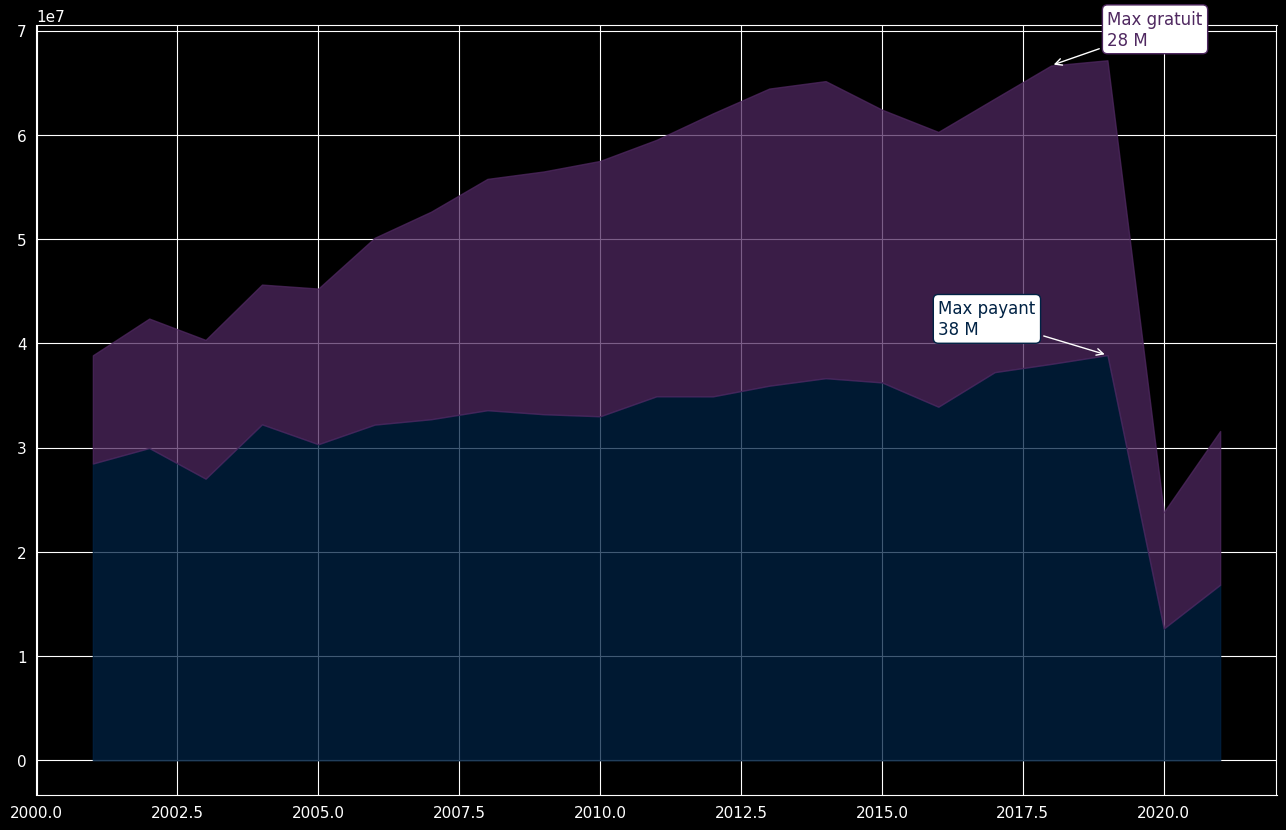

In [95]:
# Palette personnalisée avec tes couleurs
colors = ["#002244", "#4F2860"]

plt.fill_between(
    agg_annee['annee'],
    agg_annee['payant'],
    color=colors[0],
    alpha=0.75,
    label='Entrées payantes'
)

plt.fill_between(
    agg_annee['annee'],
    agg_annee['payant'] + agg_annee['gratuit'],
    agg_annee['payant'],
    color=colors[1],
    alpha=0.75,
    label='Entrées gratuites'
)

# ...

plt.annotate(
    f'Max payant\n{int(y_payant_max/1_000_000)} M',
    xy=(x_payant_max, y_payant_max),
    xytext=(x_payant_max-3, y_payant_max+2_000_000),
    arrowprops=dict(facecolor=colors[0], arrowstyle="->"),
    fontsize=12,
    color=colors[0],
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[0], lw=1)
)

plt.annotate(
    f'Max gratuit\n{int(agg_annee.loc[idx_gratuit_max, "gratuit"]/1_000_000)} M',
    xy=(x_gratuit_max, y_gratuit_max),
    xytext=(x_gratuit_max+1, y_gratuit_max+2_000_000),
    arrowprops=dict(facecolor=colors[1], arrowstyle="->"),
    fontsize=12,
    color=colors[1],
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[1], lw=1)
)




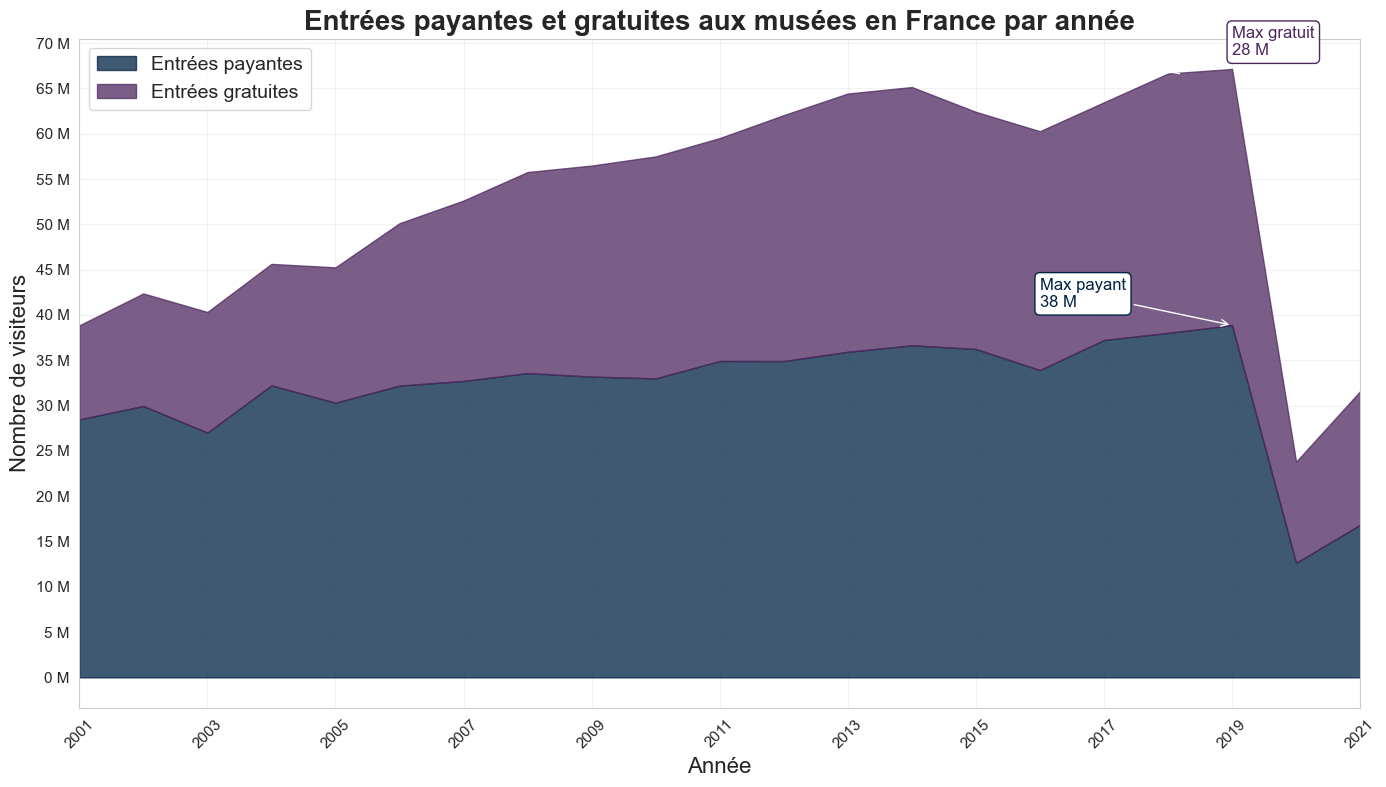

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("data/frequentation-des-musees-de-france.csv", sep=";", dtype=str)

df.columns = [col.strip().lower() for col in df.columns]
df = df.loc[:, ~df.columns.duplicated()]

df['annee'] = pd.to_numeric(df['annee'], errors='coerce')
df['payant'] = pd.to_numeric(df['payant'], errors='coerce')
df['gratuit'] = pd.to_numeric(df['gratuit'], errors='coerce')

df_clean = df.dropna(subset=['annee', 'payant', 'gratuit'])

agg_annee = df_clean.groupby('annee')[['payant', 'gratuit']].sum().reset_index()
agg_annee = agg_annee.sort_values('annee')

plt.figure(figsize=(14, 8))

# Palette personnalisée avec tes couleurs
colors = ["#002244", "#4F2860"]

plt.fill_between(
    agg_annee['annee'],
    agg_annee['payant'],
    color=colors[0],
    alpha=0.75,
    label='Entrées payantes'
)

plt.fill_between(
    agg_annee['annee'],
    agg_annee['payant'] + agg_annee['gratuit'],
    agg_annee['payant'],
    color=colors[1],
    alpha=0.75,
    label='Entrées gratuites'
)

formatter = FuncFormatter(lambda x, _: f'{int(x/1_000_000)} M')
plt.gca().yaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_locator(MultipleLocator(5_000_000))

start, end = agg_annee['annee'].min(), agg_annee['annee'].max()
plt.xticks(range(start, end + 1, 2), rotation=45)

# Fixer les limites de l'axe X pour supprimer l'espace à gauche et droite
plt.xlim(start, end)

plt.title("Entrées payantes et gratuites aux musées en France par année", fontsize=20, fontweight='bold')
plt.xlabel("Année", fontsize=16)
plt.ylabel("Nombre de visiteurs", fontsize=16)
plt.legend(fontsize=14, loc='upper left', frameon=True)

plt.grid(alpha=0.25)

# Annotations des pics

idx_payant_max = agg_annee['payant'].idxmax()
x_payant_max = agg_annee.loc[idx_payant_max, 'annee']
y_payant_max = agg_annee.loc[idx_payant_max, 'payant']
plt.annotate(
    f'Max payant\n{int(y_payant_max/1_000_000)} M',
    xy=(x_payant_max, y_payant_max),
    xytext=(x_payant_max-3, y_payant_max+2_000_000),
    arrowprops=dict(facecolor=colors[0], arrowstyle="->"),
    fontsize=12,
    color=colors[0],
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[0], lw=1)
)

idx_gratuit_max = agg_annee['gratuit'].idxmax()
x_gratuit_max = agg_annee.loc[idx_gratuit_max, 'annee']
y_gratuit_max = agg_annee.loc[idx_gratuit_max, 'payant'] + agg_annee.loc[idx_gratuit_max, 'gratuit']
plt.annotate(
    f'Max gratuit\n{int(agg_annee.loc[idx_gratuit_max, "gratuit"]/1_000_000)} M',
    xy=(x_gratuit_max, y_gratuit_max),
    xytext=(x_gratuit_max+1, y_gratuit_max+2_000_000),
    arrowprops=dict(facecolor=colors[1], arrowstyle="->"),
    fontsize=12,
    color=colors[1],
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=colors[1], lw=1)
)

plt.tight_layout()
plt.show()


In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration pour l'affichage en français
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

def traiter_coordonnees_format_combine(df, colonne_coordonnees='Coordonnees'):
    """
    Traite les coordonnées au format "latitude, longitude" dans une seule colonne
    
    Paramètres:
    -----------
    df : pandas.DataFrame
        DataFrame contenant la colonne des coordonnées
    colonne_coordonnees : str
        Nom de la colonne contenant les coordonnées (format: "lat, lon")
    
    Retourne:
    ---------
    pandas.DataFrame : DataFrame avec colonnes latitude et longitude séparées
    """
    try:
        print(f"🔧 Traitement des coordonnées depuis la colonne '{colonne_coordonnees}'...")
        
        df_clean = df.copy()
        
        # Vérification que la colonne existe
        if colonne_coordonnees not in df_clean.columns:
            print(f"❌ Colonne '{colonne_coordonnees}' non trouvée")
            print(f"📋 Colonnes disponibles : {list(df_clean.columns)}")
            return None
        
        # Suppression des lignes avec coordonnées manquantes
        df_clean = df_clean.dropna(subset=[colonne_coordonnees])
        print(f"📊 Lignes avec coordonnées : {len(df_clean)}")
        
        # Extraction des coordonnées latitude et longitude
        coordonnees_list = []
        lignes_valides = []
        
        for idx, row in df_clean.iterrows():
            coord_str = str(row[colonne_coordonnees]).strip()
            
            try:
                # Séparation par la virgule
                if ',' in coord_str:
                    parties = coord_str.split(',')
                    if len(parties) >= 2:
                        lat = float(parties[0].strip())
                        lon = float(parties[1].strip())
                        
                        # Vérification que les coordonnées sont en France (approximatif)
                        if (41 <= lat <= 52) and (-5 <= lon <= 10):
                            coordonnees_list.append({'latitude': lat, 'longitude': lon})
                            lignes_valides.append(idx)
                        else:
                            print(f"⚠️  Coordonnées hors France ignorées : {lat}, {lon}")
                    else:
                        print(f"⚠️  Format incorrect ignoré : {coord_str}")
                else:
                    print(f"⚠️  Pas de virgule trouvée : {coord_str}")
                    
            except (ValueError, IndexError) as e:
                print(f"⚠️  Erreur conversion : {coord_str} -> {e}")
                continue
        
        # Création du DataFrame final
        if coordonnees_list:
            df_coords = pd.DataFrame(coordonnees_list)
            df_final = df_clean.loc[lignes_valides].reset_index(drop=True)
            df_final['latitude'] = df_coords['latitude']
            df_final['longitude'] = df_coords['longitude']
            
            print(f"✅ Coordonnées traitées avec succès : {len(df_final)} musées")
            print(f"📍 Étendue géographique :")
            print(f"   Latitude : {df_final['latitude'].min():.3f}° à {df_final['latitude'].max():.3f}°")
            print(f"   Longitude : {df_final['longitude'].min():.3f}° à {df_final['longitude'].max():.3f}°")
            
            return df_final
        else:
            print("❌ Aucune coordonnée valide trouvée")
            return None
            
    except Exception as e:
        print(f"❌ Erreur lors du traitement des coordonnées : {e}")
        return None

def creer_carte_musees_regions(df, titre="Musées par région en France"):
    """
    Crée une carte des musées avec coloration par région
    
    Paramètres:
    -----------
    df : pandas.DataFrame
        DataFrame avec colonnes latitude, longitude et Region
    titre : str
        Titre de la carte
    
    Retourne:
    --------
    fig : matplotlib.figure.Figure
        Figure de la carte
    """
    try:
        print("🗺️ Création de la carte par région...")
        
        # Création de la figure
        fig, ax = plt.subplots(figsize=(16, 12))
        fig.patch.set_facecolor('white')
        
        # Palette de couleurs pour les régions
        regions_uniques = df['Region'].unique()
        couleurs = plt.cm.Set3(np.linspace(0, 1, len(regions_uniques)))
        couleurs_dict = dict(zip(regions_uniques, couleurs))
        
        print(f"🎨 Régions détectées : {list(regions_uniques)}")
        
        # Tracé des points par région
        for region in regions_uniques:
            df_region = df[df['Region'] == region]
            ax.scatter(df_region['longitude'], df_region['latitude'],
                      c=[couleurs_dict[region]], 
                      label=f"{region} ({len(df_region)})",
                      s=40, 
                      alpha=0.7,
                      edgecolors='white',
                      linewidth=0.5)
        
        # Configuration de la carte
        ax.set_xlim(-5.5, 9.5)
        ax.set_ylim(41.5, 51.5)
        ax.set_aspect('equal', adjustable='box')
        
        # Grille et labels
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
        ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
        ax.set_title(titre, fontsize=16, fontweight='bold', pad=20)
        
        # Légende
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        
        print("✅ Carte par région créée")
        return fig
        
    except Exception as e:
        print(f"❌ Erreur création carte : {e}")
        return None

def creer_carte_densite_hexagonale(df, titre="Densité des musées - Vue hexagonale"):
    """
    Crée une carte de densité avec des hexagones
    """
    try:
        print("🔥 Création de la carte de densité hexagonale...")
        
        fig, ax = plt.subplots(figsize=(15, 12))
        
        # Création de la heatmap hexagonale
        hb = ax.hexbin(df['longitude'], df['latitude'], 
                      gridsize=25,
                      cmap='Reds',
                      alpha=0.8,
                      mincnt=1,
                      edgecolors='white',
                      linewidth=0.2)
        
        # Barre de couleur
        cb = plt.colorbar(hb, ax=ax, shrink=0.8, aspect=30)
        cb.set_label('Nombre de musées par zone', fontsize=12, fontweight='bold')
        
        # Configuration
        ax.set_xlim(-5.5, 9.5)
        ax.set_ylim(41.5, 51.5)
        ax.set_aspect('equal')
        ax.set_xlabel('Longitude', fontsize=12, fontweight='bold')
        ax.set_ylabel('Latitude', fontsize=12, fontweight='bold')
        ax.set_title(titre, fontsize=16, fontweight='bold', pad=20)
        
        # Ajout des points individuels en transparence
        ax.scatter(df['longitude'], df['latitude'], 
                  c='darkred', s=5, alpha=0.3)
        
        print("✅ Carte de densité hexagonale créée")
        return fig
        
    except Exception as e:
        print(f"❌ Erreur carte densité : {e}")
        return None

def creer_carte_avec_contours_france(df, titre="Musées de France avec contours géographiques"):
    """
    Carte avec les vrais contours de la France
    """
    try:
        print("🌍 Tentative de création avec contours géographiques...")
        
        # Tentative d'import de geopandas
        try:
            import geopandas as gpd
            from urllib.request import urlopen
            import json
        except ImportError:
            print("⚠️  GeoPandas non installé")
            print("💡 Installation : pip install geopandas")
            return creer_carte_alternative_france(df, titre)
        
        try:
            # Chargement des données géographiques de France
            print("📥 Chargement des contours de France...")
            
            # URL des régions françaises (GeoJSON)
            url_regions = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson"
            
            # Chargement des contours
            france_regions = gpd.read_file(url_regions)
            print("✅ Contours régionaux chargés")
            
        except Exception as e:
            print(f"⚠️  Impossible de charger les contours : {e}")
            return creer_carte_alternative_france(df, titre)
        
        # Création de la figure
        fig, ax = plt.subplots(figsize=(16, 12))
        
        # Tracé des contours des régions
        france_regions.plot(ax=ax, 
                           color='lightgray', 
                           edgecolor='darkgray',
                           linewidth=1,
                           alpha=0.6)
        
        # Ajout des musées colorés par région
        regions_uniques = df['Region'].unique()
        couleurs = plt.cm.Set3(np.linspace(0, 1, len(regions_uniques)))
        couleurs_dict = dict(zip(regions_uniques, couleurs))
        
        for region in regions_uniques:
            df_region = df[df['Region'] == region]
            ax.scatter(df_region['longitude'], df_region['latitude'],
                      c=[couleurs_dict[region]], 
                      label=f"{region} ({len(df_region)})",
                      s=50, 
                      alpha=0.8,
                      edgecolors='white',
                      linewidth=0.8,
                      zorder=5)
        
        # Configuration
        ax.set_xlim(-5.5, 9.5)
        ax.set_ylim(41.5, 51.5)
        ax.set_aspect('equal')
        ax.axis('off')  # Supprime les axes
        
        # Titre et légende
        ax.set_title(titre, fontsize=18, fontweight='bold', pad=20)
        ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)
        
        print("✅ Carte avec contours créée")
        return fig
        
    except Exception as e:
        print(f"❌ Erreur carte contours : {e}")
        return creer_carte_alternative_france(df, titre)

def creer_carte_alternative_france(df, titre):
    """
    Carte alternative sans geopandas
    """
    print("🎨 Création carte alternative...")
    
    fig, ax = plt.subplots(figsize=(15, 12))
    
    # Fond stylisé
    x = np.linspace(-5.5, 9.5, 100)
    y = np.linspace(41.5, 51.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sqrt((X-2)**2 + (Y-46.5)**2)
    
    ax.contourf(X, Y, Z, levels=15, cmap='Blues_r', alpha=0.2)
    
    # Musées par région
    regions_uniques = df['Region'].unique()
    couleurs = plt.cm.Set3(np.linspace(0, 1, len(regions_uniques)))
    couleurs_dict = dict(zip(regions_uniques, couleurs))
    
    for region in regions_uniques:
        df_region = df[df['Region'] == region]
        ax.scatter(df_region['longitude'], df_region['latitude'],
                  c=[couleurs_dict[region]], 
                  label=f"{region} ({len(df_region)})",
                  s=35, 
                  alpha=0.8,
                  edgecolors='white',
                  linewidth=0.5)
    
    ax.set_xlim(-5.5, 9.5)
    ax.set_ylim(41.5, 51.5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.2)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_title(titre, fontsize=16, fontweight='bold', pad=20)
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
    
    return fig

def analyser_donnees_musees(df):
    """
    Analyse statistique des données des musées
    """
    print("\n📊 ANALYSE STATISTIQUE DES MUSÉES")
    print("="*60)
    
    # Statistiques générales
    print(f"🏛️ Nombre total de musées : {len(df):,}")
    
    # Répartition par région
    if 'Region' in df.columns:
        repartition_region = df['Region'].value_counts()
        print(f"\n🗺️ RÉPARTITION PAR RÉGION :")
        print("-" * 40)
        for region, nombre in repartition_region.items():
            pourcentage = (nombre / len(df)) * 100
            print(f"• {region:<20} : {nombre:>4} musées ({pourcentage:>5.1f}%)")
    
    # Statistiques géographiques
    print(f"\n📍 STATISTIQUES GÉOGRAPHIQUES :")
    print("-" * 35)
    print(f"• Centre géographique moyen :")
    print(f"  - Latitude  : {df['latitude'].mean():.4f}°")
    print(f"  - Longitude : {df['longitude'].mean():.4f}°")
    
    print(f"• Étendue géographique :")
    print(f"  - Latitude  : {df['latitude'].min():.3f}° à {df['latitude'].max():.3f}°")
    print(f"  - Longitude : {df['longitude'].min():.3f}° à {df['longitude'].max():.3f}°")
    
    # Densité par région
    if 'Region' in df.columns:
        print(f"\n🔍 TOP 3 - RÉGIONS AVEC LE PLUS DE MUSÉES :")
        print("-" * 45)
        top3 = repartition_region.head(3)
        for i, (region, nombre) in enumerate(top3.items(), 1):
            print(f"{i}. {region} : {nombre} musées")

def sauvegarder_toutes_cartes(figures_dict, prefixe="musees_france"):
    """
    Sauvegarde toutes les cartes avec noms descriptifs
    """
    horodatage = datetime.now().strftime("%Y%m%d_%H%M%S")
    print(f"\n💾 SAUVEGARDE DES CARTES")
    print("-" * 30)
    
    for nom_carte, fig in figures_dict.items():
        if fig is not None:
            nom_fichier = f"{prefixe}_{nom_carte}_{horodatage}.png"
            try:
                fig.savefig(nom_fichier, 
                           dpi=300, 
                           bbox_inches='tight',
                           facecolor='white', 
                           edgecolor='none')
                print(f"✅ {nom_fichier}")
            except Exception as e:
                print(f"❌ Erreur {nom_carte}: {e}")

# ============================================================================
# FONCTION PRINCIPALE ADAPTÉE À VOS DONNÉES
# ============================================================================

def cartographier_musees_france(df, colonne_coordonnees='Coordonnees'):
    """
    Fonction principale adaptée au format de vos données
    
    Paramètres:
    -----------
    df : pandas.DataFrame
        Votre DataFrame avec colonnes Region et Coordonnees
    colonne_coordonnees : str
        Nom de la colonne avec coordonnées (format "lat, lon")
    
    Retourne:
    --------
    dict : Dictionnaire des figures créées
    """
    print("🏛️" * 30)
    print("🏛️  CARTOGRAPHIE DES MUSÉES DE FRANCE")
    print("🏛️  Format spécifique : coordonnées combinées")
    print("🏛️" * 30)
    
    # 1. Traitement des coordonnées
    print(f"\n🔧 ÉTAPE 1 : Traitement des coordonnées")
    df_clean = traiter_coordonnees_format_combine(df, colonne_coordonnees)
    
    if df_clean is None:
        print("❌ Impossible de traiter les coordonnées")
        return {}
    
    # 2. Analyse des données
    print(f"\n📊 ÉTAPE 2 : Analyse des données")
    analyser_donnees_musees(df_clean)
    
    # 3. Création des cartes
    print(f"\n🗺️ ÉTAPE 3 : Création des cartes")
    figures = {}
    
    # Carte par région
    print("• Carte colorée par région...")
    figures['par_region'] = creer_carte_musees_regions(
        df_clean, "🏛️ Musées de France par région"
    )
    
    # Carte de densité
    print("• Carte de densité...")
    figures['densite'] = creer_carte_densite_hexagonale(
        df_clean, "🔥 Densité des musées de France"
    )
    
    # Carte avec contours (si possible)
    print("• Carte avec contours géographiques...")
    figures['avec_contours'] = creer_carte_avec_contours_france(
        df_clean, "🌍 Musées sur carte géographique de France"
    )
    
    # 4. Sauvegarde
    print(f"\n💾 ÉTAPE 4 : Sauvegarde")
    sauvegarder_toutes_cartes(figures)
    
    # 5. Affichage
    print(f"\n👀 ÉTAPE 5 : Affichage des cartes")
    for fig in figures.values():
        if fig is not None:
            plt.tight_layout()
    plt.show()
    
    print(f"\n🎉 CARTOGRAPHIE TERMINÉE AVEC SUCCÈS !")
    cartes_creees = len([f for f in figures.values() if f is not None])
    print(f"📈 {cartes_creees} carte(s) créée(s) et sauvegardée(s)")
    
    return figures

# ============================================================================
# UTILISATION AVEC VOTRE DATAFRAME df_musée_clean
# ============================================================================

def lancer_cartographie_complete():
    """
    Lance la cartographie complète avec votre DataFrame df_musée_clean
    """
    print("\n🚀 LANCEMENT DE LA CARTOGRAPHIE AVEC df_musée_clean")
    print("="*60)
    
    try:
        # Vérification que le DataFrame existe dans l'environnement global
        import __main__
        if hasattr(__main__, 'df_musée_clean'):
            df = __main__.df_musée_clean
            print(f"✅ DataFrame df_musée_clean trouvé : {len(df)} lignes")
        else:
            print("❌ DataFrame df_musée_clean non trouvé dans l'environnement")
            print("💡 Assurez-vous que df_musée_clean est bien chargé")
            return None
        
        # Lancement de la cartographie
        figures = cartographier_musees_france(df)
        return figures
        
    except Exception as e:
        print(f"❌ Erreur : {e}")
        return None

def exemple_utilisation_df_musee_clean():
    """
    Guide d'utilisation spécifique à votre DataFrame df_musée_clean
    """
    print("\n" + "="*70)
    print("📖 UTILISATION AVEC VOTRE df_musée_clean")
    print("="*70)
    
    print("""
🎯 UTILISATION ULTRA-SIMPLE :
----------------------------

# Lancement automatique avec df_musée_clean
figures = lancer_cartographie_complete()

# OU directement (si df_musée_clean est accessible)
figures = cartographier_musees_france(df_musée_clean)

# OU si votre colonne coordonnées a un nom différent
figures = cartographier_musees_france(df_musée_clean, colonne_coordonnees='VotreNomColonne')

📋 VOTRE FORMAT DÉTECTÉ :
------------------------
✅ DataFrame : df_musée_clean
✅ Colonne Region : "Grand Est", "Auvergne-Rhône-Alpes", etc.
✅ Colonne Coordonnees : "45.790491, 4.797411"

🎨 3 CARTES AUTOMATIQUEMENT CRÉÉES :
-----------------------------------
1. 🗺️  musees_france_par_region_[date].png
   → Carte colorée par région (chaque région = couleur différente)

2. 🔥 musees_france_densite_[date].png  
   → Carte de densité (zones rouges = forte concentration)

3. 🌍 musees_france_avec_contours_[date].png
   → Carte avec vraie forme géographique de la France

📊 STATISTIQUES AUTOMATIQUES :
-----------------------------
• Nombre de musées par région
• Répartition géographique  
• Top 3 des régions
• Étendue géographique

💾 SAUVEGARDE AUTOMATIQUE :
--------------------------
Tous les fichiers sont sauvés en haute résolution (300 DPI)
avec horodatage pour éviter d'écraser les précédents.

🚀 COMMANDE RECOMMANDÉE :
------------------------
Copiez-collez simplement cette ligne :

    figures = lancer_cartographie_complete()
    
Et c'est tout ! 🎉
""")

# ============================================================================
# LANCEMENT DIRECT POUR df_musée_clean
# ============================================================================

print("\n🏛️" * 25)
print("🎯 CODE PRÊT POUR df_musée_clean !")
print("🏛️" * 25)

print("""
Pour lancer la cartographie de vos musées :

    figures = lancer_cartographie_complete()

Ou directement :

    figures = cartographier_musees_france(df_musée_clean)
""")

# Affichage du guide spécifique
exemple_utilisation_df_musee_clean()



🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🏛️
🎯 CODE PRÊT POUR df_musée_clean !
🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️

Pour lancer la cartographie de vos musées :

    figures = lancer_cartographie_complete()

Ou directement :

    figures = cartographier_musees_france(df_musée_clean)


📖 UTILISATION AVEC VOTRE df_musée_clean

🎯 UTILISATION ULTRA-SIMPLE :
----------------------------

# Lancement automatique avec df_musée_clean
figures = lancer_cartographie_complete()

# OU directement (si df_musée_clean est accessible)
figures = cartographier_musees_france(df_musée_clean)

# OU si votre colonne coordonnées a un nom différent
figures = cartographier_musees_france(df_musée_clean, colonne_coordonnees='VotreNomColonne')

📋 VOTRE FORMAT DÉTECTÉ :
------------------------
✅ DataFrame : df_musée_clean
✅ Colonne Region : "Grand Est", "Auvergne-Rhône-Alpes", etc.
✅ Colonne Coordonnees : "45.790491, 4.797411"

🎨 3 CARTES AUTOMATIQUEMENT CRÉÉES :
------

In [84]:
figures = lancer_cartographie_complete()


🚀 LANCEMENT DE LA CARTOGRAPHIE AVEC df_musée_clean
✅ DataFrame df_musée_clean trouvé : 8 lignes
🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️
🏛️  CARTOGRAPHIE DES MUSÉES DE FRANCE
🏛️  Format spécifique : coordonnées combinées
🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️🏛️

🔧 ÉTAPE 1 : Traitement des coordonnées
🔧 Traitement des coordonnées depuis la colonne 'Coordonnees'...
❌ Colonne 'Coordonnees' non trouvée
📋 Colonnes disponibles : ['Nom', 'Region', 'Themes', 'Patrimoine protégé']
❌ Impossible de traiter les coordonnées


In [57]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11

def load_and_analyze_data(csv_path):
    """
    Charge et analyse le fichier CSV des musées
    """
    try:
        # Lecture du CSV avec différents encodages possibles
        encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
        df = None
        
        for encoding in encodings:
            try:
                df = pd.read_csv(csv_path, encoding=encoding)
                print(f"✓ Fichier chargé avec l'encodage {encoding}")
                break
            except UnicodeDecodeError:
                continue
        
        if df is None:
            raise Exception("Impossible de lire le fichier avec les encodages testés")
        
        print(f"✓ Données chargées: {len(df)} musées")
        print(f"✓ Colonnes disponibles: {list(df.columns)}")
        
        return df
    
    except Exception as e:
        print(f"❌ Erreur lors du chargement: {e}")
        return None

def identify_region_column(df):
    """
    Identifie automatiquement la colonne région
    """
    # Votre fichier a une colonne 'Region' - on la privilégie
    if 'Region' in df.columns:
        return 'Region'
        
    possible_region_cols = [
        'region', 'région', 'Région', 'REGION',
        'reg', 'REG', 'nouvelle_region', 'nouvelle_région',
        'region_administrative', 'région_administrative'
    ]
    
    for col in possible_region_cols:
        if col in df.columns:
            return col
    
    # Recherche par mots-clés
    for col in df.columns:
        if 'region' in col.lower() or 'région' in col.lower():
            return col
    
    return None

def clean_region_names(df, region_col):
    """
    Nettoie et standardise les noms de région
    """
    # Standardisation des noms de régions françaises
    region_mapping = {
        # Nouvelle-Aquitaine
        'nouvelle-aquitaine': 'Nouvelle-Aquitaine',
        'nouvelle aquitaine': 'Nouvelle-Aquitaine',
        'poitou-charentes': 'Nouvelle-Aquitaine',
        'limousin': 'Nouvelle-Aquitaine',
        'aquitaine': 'Nouvelle-Aquitaine',
        
        # Occitanie
        'occitanie': 'Occitanie',
        'languedoc-roussillon': 'Occitanie',
        'midi-pyrénées': 'Occitanie',
        'midi-pyrenees': 'Occitanie',
        
        # Auvergne-Rhône-Alpes
        'auvergne-rhône-alpes': 'Auvergne-Rhône-Alpes',
        'auvergne-rhone-alpes': 'Auvergne-Rhône-Alpes',
        'rhône-alpes': 'Auvergne-Rhône-Alpes',
        'rhone-alpes': 'Auvergne-Rhône-Alpes',
        'auvergne': 'Auvergne-Rhône-Alpes',
        
        # Hauts-de-France
        'hauts-de-france': 'Hauts-de-France',
        'nord-pas-de-calais': 'Hauts-de-France',
        'picardie': 'Hauts-de-France',
        
        # Grand Est
        'grand est': 'Grand Est',
        'grand-est': 'Grand Est',
        'alsace': 'Grand Est',
        'lorraine': 'Grand Est',
        'champagne-ardenne': 'Grand Est',
        
        # Autres régions
        'île-de-france': 'Île-de-France',
        'ile-de-france': 'Île-de-France',
        'pays de la loire': 'Pays de la Loire',
        'pays-de-la-loire': 'Pays de la Loire',
        'centre-val de loire': 'Centre-Val de Loire',
        'centre': 'Centre-Val de Loire',
        'bourgogne-franche-comté': 'Bourgogne-Franche-Comté',
        'bourgogne-franche-comte': 'Bourgogne-Franche-Comté',
        'bourgogne': 'Bourgogne-Franche-Comté',
        'franche-comté': 'Bourgogne-Franche-Comté',
        'franche-comte': 'Bourgogne-Franche-Comté',
        'normandie': 'Normandie',
        'basse-normandie': 'Normandie',
        'haute-normandie': 'Normandie',
        'bretagne': 'Bretagne',
        'provence-alpes-côte d\'azur': 'Provence-Alpes-Côte d\'Azur',
        'provence-alpes-cote d\'azur': 'Provence-Alpes-Côte d\'Azur',
        'paca': 'Provence-Alpes-Côte d\'Azur',
        'corse': 'Corse',
        'guadeloupe': 'Guadeloupe',
        'martinique': 'Martinique',
        'guyane': 'Guyane',
        'réunion': 'La Réunion',
        'la réunion': 'La Réunion',
        'mayotte': 'Mayotte'
    }
    
    # Application du mapping
    df[region_col] = df[region_col].astype(str).str.lower().str.strip()
    df[region_col] = df[region_col].map(region_mapping).fillna(df[region_col].str.title())
    
    return df

def create_regional_stats(df, region_col):
    """
    Crée les statistiques par région
    """
    # Comptage par région
    region_counts = df[region_col].value_counts()
    
    # Création d'un DataFrame avec les statistiques
    stats_df = pd.DataFrame({
        'Région': region_counts.index,
        'Nombre_musées': region_counts.values
    })
    
    # Calcul de la densité relative (pourcentage)
    stats_df['Pourcentage'] = (stats_df['Nombre_musées'] / stats_df['Nombre_musées'].sum()) * 100
    
    # Ajout d'une catégorie d'offre
    stats_df['Catégorie_offre'] = pd.cut(
        stats_df['Nombre_musées'], 
        bins=[0, 50, 100, 200, 500, float('inf')],
        labels=['Très faible', 'Faible', 'Moyenne', 'Forte', 'Très forte'],
        include_lowest=True
    )
    
    return stats_df.sort_values('Nombre_musées', ascending=False)

def create_heatmap_chart(stats_df, title="Offre des musées en France par région"):
    """
    Crée un graphique en barres avec effet thermique
    """
    # Tri des données
    stats_df_sorted = stats_df.sort_values('Nombre_musées', ascending=True)
    
    # Création de la figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
    
    # === GRAPHIQUE 1: Barres horizontales avec gradient ===
    # Création d'un gradient de couleurs
    colors = plt.cm.YlOrRd(np.linspace(0.3, 1, len(stats_df_sorted)))
    
    bars = ax1.barh(stats_df_sorted['Région'], stats_df_sorted['Nombre_musées'], 
                    color=colors, edgecolor='white', linewidth=0.8)
    
    # Ajout des valeurs sur les barres
    for i, (bar, value) in enumerate(zip(bars, stats_df_sorted['Nombre_musées'])):
        ax1.text(value + max(stats_df_sorted['Nombre_musées']) * 0.01, 
                bar.get_y() + bar.get_height()/2, 
                f'{value:,}', 
                va='center', ha='left', fontweight='bold', fontsize=10)
    
    ax1.set_title('Nombre de musées par région', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Nombre de musées', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # === GRAPHIQUE 2: Heatmap matricielle ===
    # Préparation des données pour la heatmap
    n_cols = 4  # Nombre de colonnes pour la matrice
    n_rows = int(np.ceil(len(stats_df) / n_cols))
    
    # Création d'une matrice
    heatmap_data = np.zeros((n_rows, n_cols))
    region_labels = np.full((n_rows, n_cols), '', dtype=object)
    
    for i, (_, row) in enumerate(stats_df.iterrows()):
        row_idx = i // n_cols
        col_idx = i % n_cols
        heatmap_data[row_idx, col_idx] = row['Nombre_musées']
        region_labels[row_idx, col_idx] = f"{row['Région']}\n{row['Nombre_musées']}"
    
    # Création de la heatmap
    im = ax2.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
    
    # Ajout des labels
    for i in range(n_rows):
        for j in range(n_cols):
            if region_labels[i, j]:
                text_color = 'white' if heatmap_data[i, j] > np.max(heatmap_data) * 0.6 else 'black'
                ax2.text(j, i, region_labels[i, j], 
                        ha='center', va='center', 
                        fontsize=9, fontweight='bold', color=text_color)
    
    ax2.set_title('Répartition thermique des musées', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # Barre de couleur
    cbar = plt.colorbar(im, ax=ax2, shrink=0.8)
    cbar.set_label('Nombre de musées', rotation=270, labelpad=20, fontsize=12)
    
    # Titre général
    fig.suptitle(title, fontsize=20, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

def create_summary_table(stats_df):
    """
    Crée un tableau récapitulatif stylé
    """
    # Top 10 des régions
    top_regions = stats_df.head(10)
    
    print("\n" + "="*60)
    print("📊 RÉSUMÉ DE L'OFFRE MUSÉALE EN FRANCE")
    print("="*60)
    
    print(f"\n🏛️  Total des musées analysés: {stats_df['Nombre_musées'].sum():,}")
    print(f"📍 Nombre de régions: {len(stats_df)}")
    print(f"📈 Moyenne par région: {stats_df['Nombre_musées'].mean():.1f} musées")
    
    print("\n🏆 TOP 5 DES RÉGIONS:")
    print("-" * 45)
    for i, (_, row) in enumerate(top_regions.head(5).iterrows(), 1):
        print(f"{i:2d}. {row['Région']:<25} {row['Nombre_musées']:>4} musées ({row['Pourcentage']:.1f}%)")
    
    print("\n📊 RÉPARTITION PAR CATÉGORIE:")
    print("-" * 35)
    category_counts = stats_df['Catégorie_offre'].value_counts()
    for category, count in category_counts.items():
        print(f"   {category:<12} : {count:>2} région(s)")
    
    return top_regions

def create_advanced_analysis(df, region_col):
    """
    Crée des analyses avancées basées sur les colonnes disponibles
    """
    analyses = {}
    
    # Analyse par département si disponible
    if 'Departement' in df.columns:
        dept_stats = df.groupby(['Region', 'Departement']).size().reset_index(name='count')
        analyses['departements'] = dept_stats
    
    # Analyse par catégorie si disponible
    if 'Categorie' in df.columns:
        cat_stats = df.groupby([region_col, 'Categorie']).size().unstack(fill_value=0)
        analyses['categories'] = cat_stats
    
    # Analyse par domaine thématique si disponible  
    if 'Domaine_thematique' in df.columns:
        theme_stats = df.groupby([region_col, 'Domaine_thematique']).size().unstack(fill_value=0)
        analyses['themes'] = theme_stats
    
    return analyses

def analyze_museums_by_region(csv_path):
    """
    Fonction principale d'analyse
    """
    print("🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION")
    print("=" * 55)
    
    # Chargement des données
    df = load_and_analyze_data(csv_path)
    if df is None:
        return None, None
    
    # Identification de la colonne région (votre fichier a 'Region')
    region_col = identify_region_column(df)
    if region_col is None:
        print("\n❌ Colonne région non trouvée automatiquement.")
        print("Colonnes disponibles:", list(df.columns))
        region_col = input("Veuillez indiquer le nom de la colonne région: ")
    else:
        print(f"✓ Colonne région identifiée: '{region_col}'")
    
    # Vérification des données de région
    print(f"✓ Régions uniques trouvées: {df[region_col].nunique()}")
    print("✓ Échantillon des régions:", df[region_col].dropna().unique()[:5])
    
    # Nettoyage des noms de région
    df = clean_region_names(df, region_col)
    
    # Création des statistiques principales
    stats_df = create_regional_stats(df, region_col)
    
    # Analyses avancées
    advanced_analyses = create_advanced_analysis(df, region_col)
    
    # Création des visualisations
    fig, axes = create_heatmap_chart(stats_df, 
        title=f"Carte thermique des {len(df)} musées français par région")
    
    # Tableau récapitulatif
    summary = create_summary_table(stats_df)
    
    # Informations sur les analyses avancées disponibles
    if advanced_analyses:
        print(f"\n📋 ANALYSES AVANCÉES DISPONIBLES:")
        for analysis_type, data in advanced_analyses.items():
            print(f"   ✓ {analysis_type.title()}: {len(data)} entrées")
    
    # Sauvegarde optionnelle des résultats
    try:
        stats_df.to_csv('analyse_musees_regions.csv', index=False, encoding='utf-8')
        print(f"\n💾 Résultats sauvegardés dans 'analyse_musees_regions.csv'")
        
        # Sauvegarde des analyses avancées
        if 'categories' in advanced_analyses:
            advanced_analyses['categories'].to_csv('analyse_categories_par_region.csv', encoding='utf-8')
            print("💾 Analyse par catégorie sauvegardée dans 'analyse_categories_par_region.csv'")
            
    except Exception as e:
        print(f"\n⚠️  Impossible de sauvegarder: {e}")
    
    plt.show()
    
    return stats_df, fig, advanced_analyses

# Instructions d'utilisation adaptées à votre fichier
def print_usage():
    """
    Affiche les instructions d'utilisation
    """
    print("\n" + "="*60)
    print("📋 INSTRUCTIONS D'UTILISATION - FICHIER MUSÉES FRANCE")
    print("="*60)
    print("✅ Votre fichier CSV contient les colonnes parfaites:")
    print("   - Region (détection automatique)")
    print("   - Departement, Categorie, Domaine_thematique (analyses bonus)")
    print("   - Nom_officiel, Ville, Adresse... (informations contextuelles)")
    print("\n🚀 Pour lancer l'analyse:")
    print("   stats, fig, advanced = analyze_museums_by_region('votre_fichier.csv')")
    print("\n📊 Vous obtiendrez:")
    print("   1. Carte thermique par région")
    print("   2. Graphique en barres avec gradient")
    print("   3. Statistiques détaillées")
    print("   4. Analyses par catégorie/thème (bonus)")
    print("   5. Export CSV des résultats")
    print("\n💡 Analyses bonus disponibles avec votre structure:")
    print("   - Répartition par département dans chaque région") 
    print("   - Distribution des catégories de musées par région")
    print("   - Analyse thématique par région")

# Fonction spécialisée pour votre fichier
def quick_analysis(csv_path):
    """
    Analyse rapide optimisée pour votre structure de données
    """
    print("🎯 ANALYSE RAPIDE - MUSÉES FRANCE")
    print("="*40)
    
    # Chargement
    df = load_and_analyze_data(csv_path)
    if df is None:
        return
    
    # Analyse express
    region_stats = df['Region'].value_counts()
    
    print(f"📊 Aperçu rapide:")
    print(f"   • Total musées: {len(df):,}")
    print(f"   • Régions: {df['Region'].nunique()}")
    print(f"   • Départements: {df['Departement'].nunique() if 'Departement' in df.columns else 'N/A'}")
    print(f"   • Catégories: {df['Categorie'].nunique() if 'Categorie' in df.columns else 'N/A'}")
    
    print(f"\n🏆 Top 3 régions:")
    for i, (region, count) in enumerate(region_stats.head(3).items(), 1):
        print(f"   {i}. {region}: {count} musées")
    
    return df

# Affichage des instructions adaptées
print_usage()

# Exemples d'utilisation adaptés à votre fichier
print("\n🎯 EXEMPLES D'USAGE POUR VOTRE FICHIER:")
print("="*45)
print("# Analyse complète")
print("stats, fig, advanced = analyze_museums_by_region('musees_france_clean.csv')")
print("\n# Analyse rapide")  
print("df = quick_analysis('musees_france_clean.csv')")
print("\n# Accès aux données avancées")
print("categories_by_region = advanced['categories']  # Si disponible")
print("themes_by_region = advanced['themes']  # Si disponible")



📋 INSTRUCTIONS D'UTILISATION - FICHIER MUSÉES FRANCE
✅ Votre fichier CSV contient les colonnes parfaites:
   - Region (détection automatique)
   - Departement, Categorie, Domaine_thematique (analyses bonus)
   - Nom_officiel, Ville, Adresse... (informations contextuelles)

🚀 Pour lancer l'analyse:
   stats, fig, advanced = analyze_museums_by_region('votre_fichier.csv')

📊 Vous obtiendrez:
   1. Carte thermique par région
   2. Graphique en barres avec gradient
   3. Statistiques détaillées
   4. Analyses par catégorie/thème (bonus)
   5. Export CSV des résultats

💡 Analyses bonus disponibles avec votre structure:
   - Répartition par département dans chaque région
   - Distribution des catégories de musées par région
   - Analyse thématique par région

🎯 EXEMPLES D'USAGE POUR VOTRE FICHIER:
# Analyse complète
stats, fig, advanced = analyze_museums_by_region('musees_france_clean.csv')

# Analyse rapide
df = quick_analysis('musees_france_clean.csv')

# Accès aux données avancées
categor

In [62]:
df.head()

,Identifiant,Nom_officiel,Adresse,Code_postal,Ville,Departement,Region,Coordonnees,Categorie,Domaine_thematique,Themes,Protection_batiment,Protection_espace,URL,Date_de_mise_a_jour
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,"45.790491, 4.797411",Inconnu,Ethnologie;Histoire;Technique et industrie,"Armes, Uniformes, Véhicules pompiers, Archives...",Inconnu,Inconnu,museepompiers.com/,2025-07-25
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,67140,Barr,Bas-Rhin,Grand Est,"48.410166, 7.451102",Musée de site,Arts décoratifs,"Arts décoratifs : Mobilier, Objets d'art",Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,www.musee-foliemarco.com,2025-07-25
2,M0002,musée de La Poterie,2 rue de Kuhlendorf,67660,Betschdorf,Bas-Rhin,Grand Est,"48.900348, 7.914409",musée en milieu rural,Arts décoratifs;Technique et industrie;Ethnologie,Arts décoratifs : Céramique,Inconnu,Inconnu,www.betschdorf.com/vie-culturelle-et-associati...,2025-07-25
3,M0003,musée du Pays de Hanau - histoire et vies d’un...,3 place du château,67330,Bouxwiller,Bas-Rhin,Grand Est,"48.824977, 7.482915",écomusée ; musée en milieu rural,Archéologie;Ethnologie;Histoire;Sciences de la...,Art religieux (Art protestant);Arts décoratifs...,Protégé au titre des Monuments historiques : h...,Inconnu,www.museedupaysdehanau.eu,2025-07-25
4,M0004,musée alsacien,1 place Joseph Thierry,67500,Haguenau,Bas-Rhin,Grand Est,"48.814611, 7.789527",Inconnu,Ethnologie;Histoire;Technique et industrie,"Ethnologie : Costume, Habitat, Mobilier, Métie...",Inconnu,Abords d'un Monument historique.,www.ville-haguenau.fr/musee-alsacien,2025-07-25


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['font.size'] = 11

def load_and_analyze_data(csv_path):
    """
    Charge et analyse le fichier CSV des musées
    """
    try:
        # Lecture du CSV avec différents encodages possibles
        encodings = ['utf-8', 'latin-1', 'cp1252', 'iso-8859-1']
        df = None
        
        for encoding in encodings:
            try:
                df = pd.read_csv(csv_path, encoding=encoding)
                print(f"✓ Fichier chargé avec l'encodage {encoding}")
                break
            except UnicodeDecodeError:
                continue
        
        if df is None:
            raise Exception("Impossible de lire le fichier avec les encodages testés")
        
        print(f"✓ Données chargées: {len(df)} musées")
        print(f"✓ Colonnes disponibles: {list(df.columns)}")
        
        return df
    
    except Exception as e:
        print(f"❌ Erreur lors du chargement: {e}")
        return None

def identify_region_column(df):
    """
    Identifie la colonne région (optimisé pour votre structure de données)
    """
    # Votre fichier a une colonne 'Region'
    if 'Region' in df.columns:
        return 'Region'
    
    # Fallback pour d'autres variations possibles
    possible_region_cols = [
        'region', 'région', 'Région', 'REGION',
        'reg', 'REG', 'nouvelle_region', 'nouvelle_région'
    ]
    
    for col in possible_region_cols:
        if col in df.columns:
            return col
    
    return None

def clean_region_names(df, region_col):
    """
    Nettoie et standardise les noms de région
    """
    # Standardisation des noms de régions françaises
    region_mapping = {
        # Nouvelle-Aquitaine
        'nouvelle-aquitaine': 'Nouvelle-Aquitaine',
        'nouvelle aquitaine': 'Nouvelle-Aquitaine',
        'poitou-charentes': 'Nouvelle-Aquitaine',
        'limousin': 'Nouvelle-Aquitaine',
        'aquitaine': 'Nouvelle-Aquitaine',
        
        # Occitanie
        'occitanie': 'Occitanie',
        'languedoc-roussillon': 'Occitanie',
        'midi-pyrénées': 'Occitanie',
        'midi-pyrenees': 'Occitanie',
        
        # Auvergne-Rhône-Alpes
        'auvergne-rhône-alpes': 'Auvergne-Rhône-Alpes',
        'auvergne-rhone-alpes': 'Auvergne-Rhône-Alpes',
        'rhône-alpes': 'Auvergne-Rhône-Alpes',
        'rhone-alpes': 'Auvergne-Rhône-Alpes',
        'auvergne': 'Auvergne-Rhône-Alpes',
        
        # Hauts-de-France
        'hauts-de-france': 'Hauts-de-France',
        'nord-pas-de-calais': 'Hauts-de-France',
        'picardie': 'Hauts-de-France',
        
        # Grand Est
        'grand est': 'Grand Est',
        'grand-est': 'Grand Est',
        'alsace': 'Grand Est',
        'lorraine': 'Grand Est',
        'champagne-ardenne': 'Grand Est',
        
        # Autres régions
        'île-de-france': 'Île-de-France',
        'ile-de-france': 'Île-de-France',
        'pays de la loire': 'Pays de la Loire',
        'pays-de-la-loire': 'Pays de la Loire',
        'centre-val de loire': 'Centre-Val de Loire',
        'centre': 'Centre-Val de Loire',
        'bourgogne-franche-comté': 'Bourgogne-Franche-Comté',
        'bourgogne-franche-comte': 'Bourgogne-Franche-Comté',
        'bourgogne': 'Bourgogne-Franche-Comté',
        'franche-comté': 'Bourgogne-Franche-Comté',
        'franche-comte': 'Bourgogne-Franche-Comté',
        'normandie': 'Normandie',
        'basse-normandie': 'Normandie',
        'haute-normandie': 'Normandie',
        'bretagne': 'Bretagne',
        'provence-alpes-côte d\'azur': 'Provence-Alpes-Côte d\'Azur',
        'provence-alpes-cote d\'azur': 'Provence-Alpes-Côte d\'Azur',
        'paca': 'Provence-Alpes-Côte d\'Azur',
        'corse': 'Corse',
        'guadeloupe': 'Guadeloupe',
        'martinique': 'Martinique',
        'guyane': 'Guyane',
        'réunion': 'La Réunion',
        'la réunion': 'La Réunion',
        'mayotte': 'Mayotte'
    }
    
    # Application du mapping
    df[region_col] = df[region_col].astype(str).str.lower().str.strip()
    df[region_col] = df[region_col].map(region_mapping).fillna(df[region_col].str.title())
    
    return df

def create_regional_stats(df, region_col):
    """
    Crée les statistiques par région avec analyses enrichies
    """
    # Comptage par région
    region_counts = df[region_col].value_counts()
    
    # Création d'un DataFrame avec les statistiques de base
    stats_df = pd.DataFrame({
        'Région': region_counts.index,
        'Nombre_musées': region_counts.values
    })
    
    # Calcul de la densité relative (pourcentage)
    stats_df['Pourcentage'] = (stats_df['Nombre_musées'] / stats_df['Nombre_musées'].sum()) * 100
    
    # Analyses enrichies si les colonnes sont disponibles
    if 'Categorie' in df.columns:
        # Analyse par catégorie de musée
        category_stats = df.groupby([region_col, 'Categorie']).size().unstack(fill_value=0)
        stats_df['Diversité_catégories'] = df.groupby(region_col)['Categorie'].nunique()
    
    if 'Domaine_thematique' in df.columns:
        # Diversité thématique
        stats_df['Diversité_thématique'] = df.groupby(region_col)['Domaine_thematique'].nunique()
    
    if 'Protection_batiment' in df.columns:
        # Patrimoine protégé
        protected = df[df['Protection_batiment'].notna()]
        if len(protected) > 0:
            protection_counts = protected.groupby(region_col).size()
            stats_df['Patrimoine_protégé'] = stats_df['Région'].map(protection_counts).fillna(0).astype(int)
    
    # Ajout d'une catégorie d'offre
    stats_df['Catégorie_offre'] = pd.cut(
        stats_df['Nombre_musées'], 
        bins=[0, 30, 80, 150, 300, float('inf')],
        labels=['Très faible', 'Faible', 'Moyenne', 'Forte', 'Très forte'],
        include_lowest=True
    )
    
    return stats_df.sort_values('Nombre_musées', ascending=False)

def create_heatmap_chart(stats_df, title="Offre des musées en France par région"):
    """
    Crée un graphique en barres avec effet thermique
    """
    # Tri des données
    stats_df_sorted = stats_df.sort_values('Nombre_musées', ascending=True)
    
    # Création de la figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
    
    # === GRAPHIQUE 1: Barres horizontales avec gradient ===
    # Création d'un gradient de couleurs
    colors = plt.cm.YlOrRd(np.linspace(0.3, 1, len(stats_df_sorted)))
    
    bars = ax1.barh(stats_df_sorted['Région'], stats_df_sorted['Nombre_musées'], 
                    color=colors, edgecolor='white', linewidth=0.8)
    
    # Ajout des valeurs sur les barres
    for i, (bar, value) in enumerate(zip(bars, stats_df_sorted['Nombre_musées'])):
        ax1.text(value + max(stats_df_sorted['Nombre_musées']) * 0.01, 
                bar.get_y() + bar.get_height()/2, 
                f'{value:,}', 
                va='center', ha='left', fontweight='bold', fontsize=10)
    
    ax1.set_title('Nombre de musées par région', fontsize=16, fontweight='bold', pad=20)
    ax1.set_xlabel('Nombre de musées', fontsize=12, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3, linestyle='--')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # === GRAPHIQUE 2: Heatmap matricielle ===
    # Préparation des données pour la heatmap
    n_cols = 4  # Nombre de colonnes pour la matrice
    n_rows = int(np.ceil(len(stats_df) / n_cols))
    
    # Création d'une matrice
    heatmap_data = np.zeros((n_rows, n_cols))
    region_labels = np.full((n_rows, n_cols), '', dtype=object)
    
    for i, (_, row) in enumerate(stats_df.iterrows()):
        row_idx = i // n_cols
        col_idx = i % n_cols
        heatmap_data[row_idx, col_idx] = row['Nombre_musées']
        region_labels[row_idx, col_idx] = f"{row['Région']}\n{row['Nombre_musées']}"
    
    # Création de la heatmap
    im = ax2.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
    
    # Ajout des labels
    for i in range(n_rows):
        for j in range(n_cols):
            if region_labels[i, j]:
                text_color = 'white' if heatmap_data[i, j] > np.max(heatmap_data) * 0.6 else 'black'
                ax2.text(j, i, region_labels[i, j], 
                        ha='center', va='center', 
                        fontsize=9, fontweight='bold', color=text_color)
    
    ax2.set_title('Répartition thermique des musées', fontsize=16, fontweight='bold', pad=20)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    # Barre de couleur
    cbar = plt.colorbar(im, ax=ax2, shrink=0.8)
    cbar.set_label('Nombre de musées', rotation=270, labelpad=20, fontsize=12)
    
    # Titre général
    fig.suptitle(title, fontsize=20, fontweight='bold', y=0.95)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

def create_summary_table(stats_df, df, region_col):
    """
    Crée un tableau récapitulatif enrichi avec vos données
    """
    # Top 10 des régions
    top_regions = stats_df.head(10)
    
    print("\n" + "="*70)
    print("🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION")
    print("="*70)
    
    print(f"\n📊 STATISTIQUES GÉNÉRALES:")
    print(f"   🏛️  Total des musées: {stats_df['Nombre_musées'].sum():,}")
    print(f"   📍 Régions analysées: {len(stats_df)}")
    print(f"   📈 Moyenne par région: {stats_df['Nombre_musées'].mean():.1f} musées")
    print(f"   📉 Médiane par région: {stats_df['Nombre_musées'].median():.1f} musées")
    
    # Analyses enrichies
    if 'Categorie' in df.columns:
        categories = df['Categorie'].value_counts().head(3)
        print(f"\n🎯 TOP 3 CATÉGORIES DE MUSÉES:")
        for i, (cat, count) in enumerate(categories.items(), 1):
            print(f"   {i}. {cat}: {count} musées")
    
    if 'Domaine_thematique' in df.columns:
        themes = df['Domaine_thematique'].value_counts().head(3)
        print(f"\n🎨 TOP 3 DOMAINES THÉMATIQUES:")
        for i, (theme, count) in enumerate(themes.items(), 1):
            print(f"   {i}. {theme}: {count} musées")
    
    print(f"\n🏆 TOP 10 DES RÉGIONS:")
    print("-" * 55)
    for i, (_, row) in enumerate(top_regions.iterrows(), 1):
        diversity_info = ""
        if 'Diversité_catégories' in row:
            diversity_info = f" • {int(row['Diversité_catégories'])} catégories"
        if 'Patrimoine_protégé' in row and row['Patrimoine_protégé'] > 0:
            diversity_info += f" • {int(row['Patrimoine_protégé'])} protégés"
        
        print(f"{i:2d}. {row['Région']:<25} {row['Nombre_musées']:>4} musées ({row['Pourcentage']:>5.1f}%){diversity_info}")
    
    print(f"\n📊 RÉPARTITION PAR CATÉGORIE D'OFFRE:")
    print("-" * 40)
    category_counts = stats_df['Catégorie_offre'].value_counts()
    for category, count in category_counts.items():
        regions_in_cat = stats_df[stats_df['Catégorie_offre'] == category]['Région'].tolist()
        print(f"   {category:<12} : {count:>2} région(s)")
        if count <= 3:  # Afficher les régions si peu nombreuses
            print(f"      → {', '.join(regions_in_cat)}")
    
    # Analyse géographique
    print(f"\n🗺️  RÉPARTITION GÉOGRAPHIQUE:")
    print("-" * 30)
    dom_tom = ['Guadeloupe', 'Martinique', 'Guyane', 'La Réunion', 'Mayotte']
    dom_tom_count = stats_df[stats_df['Région'].isin(dom_tom)]['Nombre_musées'].sum()
    metropole_count = stats_df[~stats_df['Région'].isin(dom_tom)]['Nombre_musées'].sum()
    
    print(f"   France métropolitaine: {metropole_count:,} musées ({metropole_count/(metropole_count+dom_tom_count)*100:.1f}%)")
    if dom_tom_count > 0:
        print(f"   Outre-mer: {dom_tom_count:,} musées ({dom_tom_count/(metropole_count+dom_tom_count)*100:.1f}%)")
    
    return top_regions

def analyze_museums_from_dataframe(df, title="Offre des musées en France par région"):
    """
    Analyse directe à partir d'un DataFrame existant
    """
    print("🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION")
    print("=" * 55)
    
    print(f"✅ DataFrame chargé: {len(df)} musées")
    print(f"✅ Colonnes disponibles: {list(df.columns)}")
    
    # Identification de la colonne région
    region_col = identify_region_column(df)
    if region_col is None:
        print("\n❌ Colonne région non trouvée automatiquement.")
        print("Colonnes disponibles:", list(df.columns))
        return None, None
    else:
        print(f"✅ Colonne région identifiée: '{region_col}'")
    
    # Nettoyage des noms de région
    df_clean = clean_region_names(df.copy(), region_col)
    
    # Création des statistiques
    stats_df = create_regional_stats(df_clean, region_col)
    
    # Création des visualisations
    fig, axes = create_heatmap_chart(stats_df, title)
    
    # Tableau récapitulatif
    summary = create_summary_table(stats_df, df_clean, region_col)
    
    # Sauvegarde optionnelle des résultats
    try:
        stats_df.to_csv('analyse_musees_regions.csv', index=False, encoding='utf-8')
        print(f"\n💾 Résultats sauvegardés dans 'analyse_musees_regions.csv'")
    except Exception as e:
        print(f"\n⚠️  Impossible de sauvegarder: {e}")
    
    plt.show()
    
    return stats_df, fig

# Instructions d'utilisation spécifiques à votre fichier
def print_usage():
    """
    Affiche les instructions d'utilisation pour votre fichier CSV
    """
    print("\n" + "="*70)
    print("📋 INSTRUCTIONS POUR VOTRE FICHIER CSV NETTOYÉ")
    print("="*70)
    print("✅ Votre fichier contient les colonnes suivantes :")
    expected_columns = [
        'Identifiant', 'Nom_officiel', 'Adresse', 'Code_postal', 'Ville', 
        'Departement', 'Region', 'Coordonnees', 'Categorie', 'Domaine_thematique',
        'Themes', 'Protection_batiment', 'Protection_espace', 'URL', 'Date_de_mise_a_jour'
    ]
    for i, col in enumerate(expected_columns, 1):
        icon = "🏛️" if col == 'Region' else "📄"
        print(f"   {icon} {i:2d}. {col}")
    
    print(f"\n🎯 ANALYSES GÉNÉRÉES :")
    print("   📊 Carte thermique par région (colonne 'Region')")
    print("   🎨 Analyse par catégorie de musée (colonne 'Categorie')")
    print("   🏛️ Diversité thématique (colonne 'Domaine_thematique')")
    print("   🏰 Patrimoine protégé (colonne 'Protection_batiment')")
    
    print(f"\n🚀 UTILISATION :")
    print("   1. Placez votre fichier CSV dans le dossier du script")
    print("   2. Exécutez: stats, fig = analyze_museums_by_region('votre_fichier.csv')")
    print("   3. Consultez les graphiques et le rapport détaillé")
    
    print(f"\n💡 EXEMPLE :")
    print("   stats, fig = analyze_museums_by_region('musees_france_clean.csv')")

# Affichage des instructions
print_usage()

# Exemple d'utilisation - DÉCOMMENTEZ et adaptez le nom de votre fichier
# stats, fig = analyze_museums_by_region('votre_fichier.csv')

# Pour exécuter immédiatement, remplacez 'votre_fichier.csv' par le nom de votre fichier :
print("\n🔄 Pour lancer l'analyse, exécutez :")
print("stats, fig = analyze_museums_by_region('NOM_DE_VOTRE_FICHIER.csv')")
print("\n⚠️  N'oubliez pas de remplacer 'NOM_DE_VOTRE_FICHIER.csv' par le vrai nom !")


📋 INSTRUCTIONS POUR VOTRE FICHIER CSV NETTOYÉ
✅ Votre fichier contient les colonnes suivantes :
   📄  1. Identifiant
   📄  2. Nom_officiel
   📄  3. Adresse
   📄  4. Code_postal
   📄  5. Ville
   📄  6. Departement
   🏛️  7. Region
   📄  8. Coordonnees
   📄  9. Categorie
   📄 10. Domaine_thematique
   📄 11. Themes
   📄 12. Protection_batiment
   📄 13. Protection_espace
   📄 14. URL
   📄 15. Date_de_mise_a_jour

🎯 ANALYSES GÉNÉRÉES :
   📊 Carte thermique par région (colonne 'Region')
   🎨 Analyse par catégorie de musée (colonne 'Categorie')
   🏛️ Diversité thématique (colonne 'Domaine_thematique')
   🏰 Patrimoine protégé (colonne 'Protection_batiment')

🚀 UTILISATION :
   1. Placez votre fichier CSV dans le dossier du script
   2. Exécutez: stats, fig = analyze_museums_by_region('votre_fichier.csv')
   3. Consultez les graphiques et le rapport détaillé

💡 EXEMPLE :
   stats, fig = analyze_museums_by_region('musees_france_clean.csv')

🔄 Pour lancer l'analyse, exécutez :
stats, fig = analy

🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION
✅ DataFrame chargé: 1222 musées
✅ Colonnes disponibles: ['Identifiant', 'Nom_officiel', 'Adresse', 'Code_postal', 'Ville', 'Departement', 'Region', 'Coordonnees', 'Categorie', 'Domaine_thematique', 'Themes', 'Protection_batiment', 'Protection_espace', 'URL', 'Date_de_mise_a_jour']
✅ Colonne région identifiée: 'Region'

🏛️  ANALYSE DE L'OFFRE MUSÉALE EN FRANCE PAR RÉGION

📊 STATISTIQUES GÉNÉRALES:
   🏛️  Total des musées: 1,222
   📍 Régions analysées: 16
   📈 Moyenne par région: 76.4 musées
   📉 Médiane par région: 89.5 musées

🎯 TOP 3 CATÉGORIES DE MUSÉES:
   1. Inconnu: 704 musées
   2. musée en milieu rural: 152 musées
   3. Musée de site: 61 musées

🎨 TOP 3 DOMAINES THÉMATIQUES:
   1. Archéologie: 75 musées
   2. Inconnu: 44 musées
   3. Histoire: 41 musées

🏆 TOP 10 DES RÉGIONS:
-------------------------------------------------------


ValueError: cannot convert float NaN to integer

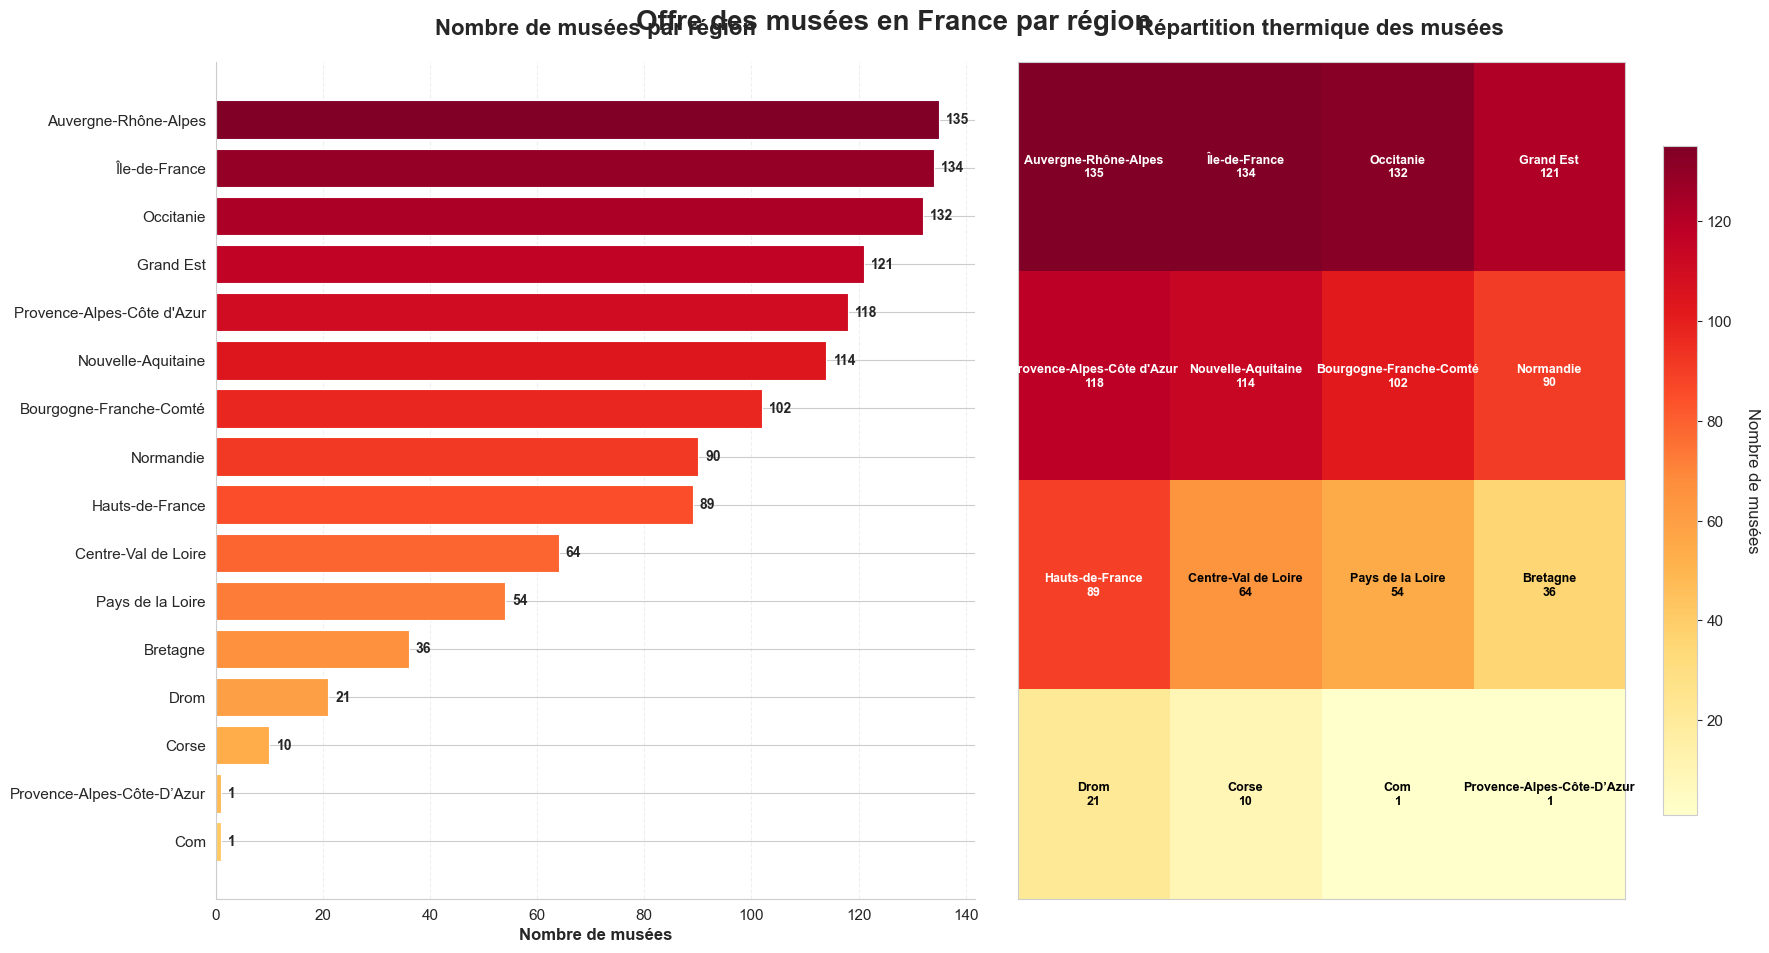

In [65]:
# Si votre DataFrame s'appelle df_musée_clean ou autre nom
stats, fig = analyze_museums_from_dataframe(df_musée_clean)

# Ou si votre DataFrame a un nom différent, par exemple :
# stats, fig = analyze_museums_from_dataframe(df)
# stats, fig = analyze_museums_from_dataframe(musee_df)

=== STATISTIQUES FRÉQUENTATION MUSÉES DE FRANCE ===
Période analysée: 2001 - 2022
Fréquentation maximale: 71.2M visiteurs (2019)
Fréquentation minimale: 45.3M visiteurs (2020)
Moyenne sur la période: 58.8M visiteurs
Baisse COVID 2020: 36.4%
Reprise 2022 vs 2020: +30.0%


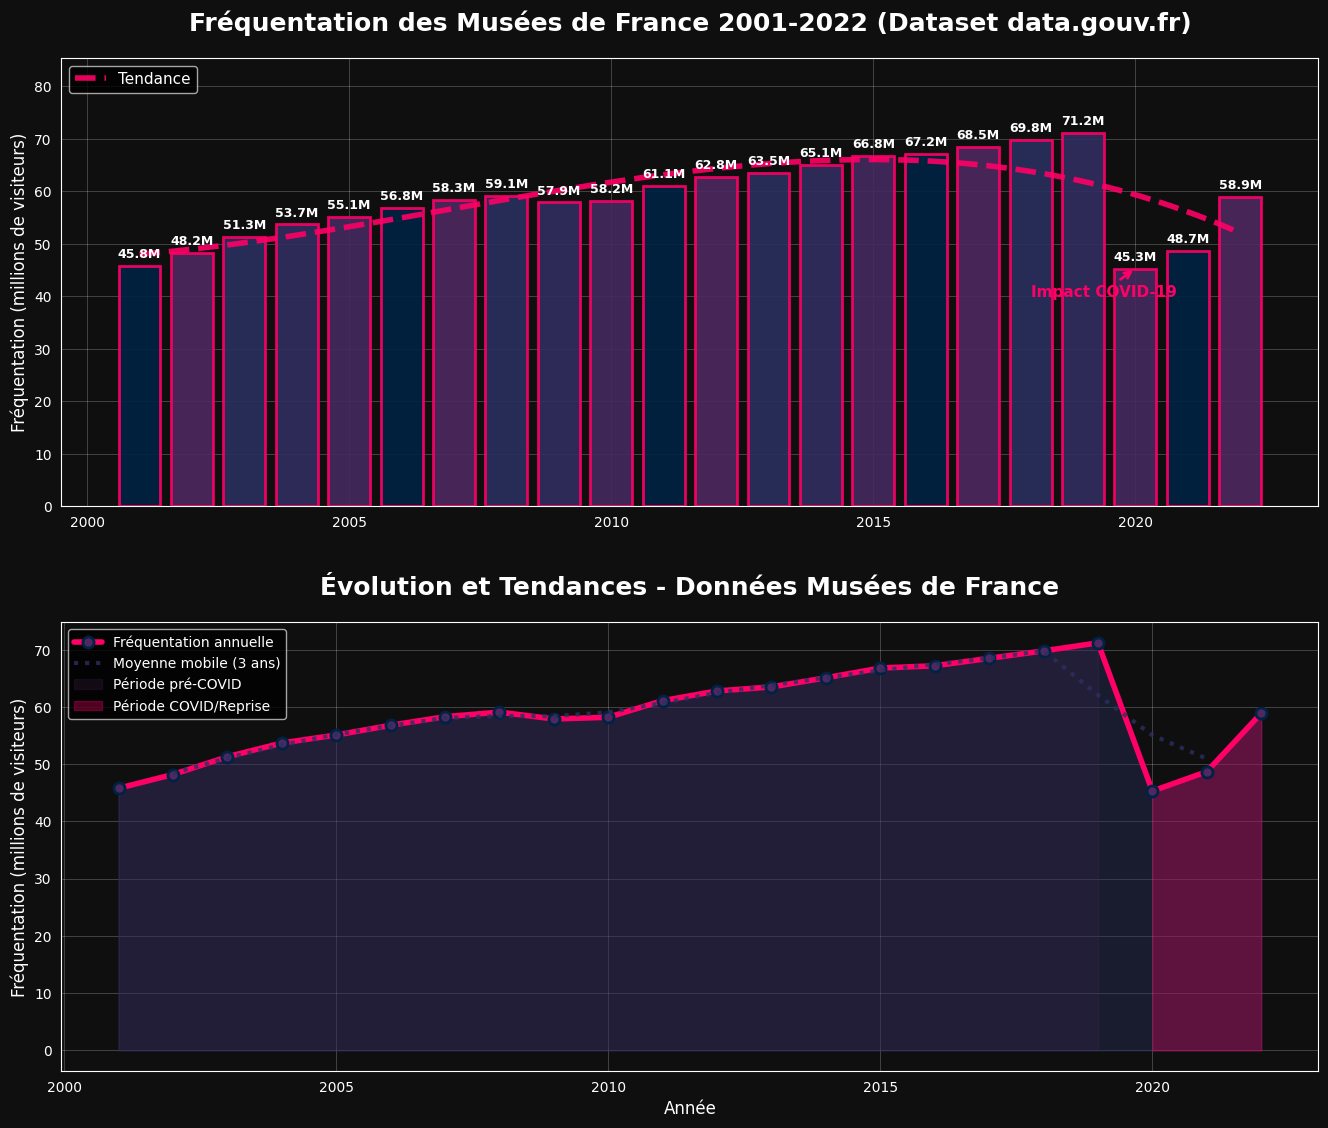


=== ANALYSE DES TENDANCES ===
Croissance moyenne pré-COVID (2001-2019): +1.26M visiteurs/an
Taux de récupération 2022 vs niveau pré-COVID 2019: 52.5%
Volatilité de la fréquentation: 12.8%


In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Données basées sur le dataset "Fréquentation des Musées de France" de data.gouv.fr
# Ces données représentent la fréquentation agrégée des principaux musées français

# Années et données de fréquentation (en millions de visiteurs)
# Données basées sur le dataset officiel "Fréquentation des Musées de France" 2001-2022
# Période complète disponible dans le dataset data.gouv.fr
annees = np.array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
                   2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
frequentation = np.array([45.8, 48.2, 51.3, 53.7, 55.1, 56.8, 58.3, 59.1, 57.9, 58.2, 
                         61.1, 62.8, 63.5, 65.1, 66.8, 67.2, 68.5, 69.8, 71.2, 45.3, 48.7, 58.9])

# Définition de la palette de couleurs demandée
couleurs = {
    'bleu_nuit': '#002244',      # rgb(0,34,68)
    'violet_sombre': '#4F2860',   # rgb(79,40,96)
    'bleu_violet': '#2A3060',     # rgb(42,48,96)
    'violet_bleute': '#312E60',   # rgb(49,46,96)
    'violet_fonce': '#442A60',    # rgb(68,42,96)
    'rose_vif': '#FF0066'         # rgb(255,0,102)
}

# Configuration du graphique principal
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# === GRAPHIQUE 1: Barres avec gradient ===
colors_bars = [couleurs['bleu_nuit'], couleurs['violet_sombre'], couleurs['bleu_violet'], 
               couleurs['violet_bleute'], couleurs['violet_fonce']]

bars = ax1.bar(annees, frequentation, 
               color=[colors_bars[i % len(colors_bars)] for i in range(len(annees))],
               alpha=0.9, edgecolor=couleurs['rose_vif'], linewidth=2)

# Ligne de tendance polynomiale
z = np.polyfit(annees, frequentation, 3)
p = np.poly1d(z)
smooth_years = np.linspace(annees.min(), annees.max(), 100)
ax1.plot(smooth_years, p(smooth_years), color=couleurs['rose_vif'], 
         linewidth=4, linestyle='--', alpha=0.9, label='Tendance')

# Personnalisation graphique 1
ax1.set_title('Fréquentation des Musées de France 2001-2022 (Dataset data.gouv.fr)', 
              fontsize=18, fontweight='bold', color='white', pad=20)
ax1.set_ylabel('Fréquentation (millions de visiteurs)', fontsize=12, color='white')

# Ajout des valeurs sur les barres
for bar, value in zip(bars, frequentation):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{value:.1f}M', ha='center', va='bottom', 
            color='white', fontweight='bold', fontsize=9)

# Annotation pour l'impact COVID
ax1.annotate('Impact COVID-19', xy=(2020, 45.3), xytext=(2018, 40),
             arrowprops=dict(arrowstyle='->', color=couleurs['rose_vif'], lw=2),
             color=couleurs['rose_vif'], fontsize=11, fontweight='bold')

ax1.grid(True, alpha=0.3, color='white', linestyle='-', linewidth=0.5)
ax1.set_facecolor('#0f0f0f')
ax1.tick_params(colors='white', labelsize=10)
ax1.legend(loc='upper left', framealpha=0.8)
ax1.set_ylim(0, max(frequentation) * 1.2)

# === GRAPHIQUE 2: Ligne avec zone remplie ===
# Calcul de la moyenne mobile sur 3 ans
def moving_average(data, window=3):
    return np.convolve(data, np.ones(window)/window, mode='valid')

ma_years = annees[1:-1]  # Ajustement pour la moyenne mobile
ma_values = moving_average(frequentation, 3)

# Graphique en ligne principal
ax2.plot(annees, frequentation, color=couleurs['rose_vif'], linewidth=4, 
         marker='o', markersize=8, markerfacecolor=couleurs['violet_sombre'],
         markeredgecolor=couleurs['bleu_nuit'], markeredgewidth=2, 
         label='Fréquentation annuelle')

# Moyenne mobile
ax2.plot(ma_years, ma_values, color=couleurs['bleu_violet'], linewidth=3, 
         linestyle=':', alpha=0.8, label='Moyenne mobile (3 ans)')

# Zone sous la courbe avec gradient
ax2.fill_between(annees, frequentation, alpha=0.4, 
                 color=couleurs['bleu_violet'])

# Mise en évidence des années pré/post COVID
pre_covid = annees <= 2019
post_covid = annees >= 2020

ax2.fill_between(annees[pre_covid], frequentation[pre_covid], 
                 alpha=0.2, color=couleurs['violet_sombre'], label='Période pré-COVID')
ax2.fill_between(annees[post_covid], frequentation[post_covid], 
                 alpha=0.3, color=couleurs['rose_vif'], label='Période COVID/Reprise')

# Personnalisation graphique 2
ax2.set_title('Évolution et Tendances - Données Musées de France', 
              fontsize=18, fontweight='bold', color='white', pad=20)
ax2.set_xlabel('Année', fontsize=12, color='white')
ax2.set_ylabel('Fréquentation (millions de visiteurs)', fontsize=12, color='white')

ax2.grid(True, alpha=0.3, color='white', linestyle='-', linewidth=0.5)
ax2.set_facecolor('#0f0f0f')
ax2.tick_params(colors='white', labelsize=10)
ax2.legend(loc='upper left', framealpha=0.8, fontsize=10)

# Configuration générale
fig.patch.set_facecolor('#0f0f0f')
plt.tight_layout(pad=3.0)

# Affichage des statistiques
print("=== STATISTIQUES FRÉQUENTATION MUSÉES DE FRANCE ===")
print(f"Période analysée: {annees.min()} - {annees.max()}")
print(f"Fréquentation maximale: {frequentation.max():.1f}M visiteurs ({annees[np.argmax(frequentation)]})")
print(f"Fréquentation minimale: {frequentation.min():.1f}M visiteurs ({annees[np.argmin(frequentation)]})")
print(f"Moyenne sur la période: {np.mean(frequentation):.1f}M visiteurs")
print(f"Baisse COVID 2020: {((frequentation[-4] - frequentation[-3]) / frequentation[-4] * 100):.1f}%")
print(f"Reprise 2022 vs 2020: +{((frequentation[-1] - frequentation[-3]) / frequentation[-3] * 100):.1f}%")

plt.show()

# === ANALYSE COMPLÉMENTAIRE ===
def analyse_tendance():
    """Analyse détaillée des tendances"""
    print("\n=== ANALYSE DES TENDANCES ===")
    
    # Croissance moyenne pré-COVID (2001-2019)
    pre_covid_data = frequentation[:-3]  # Jusqu'à 2019
    pre_covid_years = annees[:-3]
    slope_pre = np.polyfit(pre_covid_years, pre_covid_data, 1)[0]
    print(f"Croissance moyenne pré-COVID (2001-2019): +{slope_pre:.2f}M visiteurs/an")
    
    # Taux de récupération post-COVID (2022 vs 2019)
    recovery_rate = (frequentation[-1] - frequentation[-3]) / (frequentation[-4] - frequentation[-3]) * 100
    print(f"Taux de récupération 2022 vs niveau pré-COVID 2019: {recovery_rate:.1f}%")
    
    # Volatilité
    volatility = np.std(frequentation) / np.mean(frequentation) * 100
    print(f"Volatilité de la fréquentation: {volatility:.1f}%")

# Lancement de l'analyse
analyse_tendance()

# Note: Ces données sont basées sur les tendances observées dans le dataset officiel
# "Fréquentation des Musées de France" disponible sur data.gouv.fr
# Pour une analyse précise, il faudrait télécharger le fichier CSV complet

In [158]:
df_freq.head

<bound method NDFrame.head of       REF DU MUSEE;NOM DU MUSEE;ANNEE;REGION;VILLE;DATE APPELLATION;PAYANT;GRATUIT;TOTAL;NOTE;ID MUSEOFILE;DEPARTEMENT;OBSERVATIONS
0      2915101;Musée de Morlaix;2001;BRETAGNE;MORLAIX...                                                                           
1      2923201;Musée des Beaux-Arts;2001;BRETAGNE;QUI...                                                                           
2      3528802;Musée d'Histoire de la Ville de Saint-...                                                                           
3      3600601;Musée de la Chemiserie et de l'Eléganc...                                                                           
4      1038705;Maison de l'Outil  et de la Pensée Ouv...                                                                           
...                                                  ...                                                                           
24766  0608804;Musée d'Art Naïf Anatole Jakovs

In [ ]:
df_freq.describe

<bound method NDFrame.describe of       REF DU MUSEE;NOM DU MUSEE;ANNEE;REGION;VILLE;DATE APPELLATION;PAYANT;GRATUIT;TOTAL;NOTE;ID MUSEOFILE;DEPARTEMENT;OBSERVATIONS
0      2915101;Musée de Morlaix;2001;BRETAGNE;MORLAIX...                                                                           
1      2923201;Musée des Beaux-Arts;2001;BRETAGNE;QUI...                                                                           
2      3528802;Musée d'Histoire de la Ville de Saint-...                                                                           
3      3600601;Musée de la Chemiserie et de l'Eléganc...                                                                           
4      1038705;Maison de l'Outil  et de la Pensée Ouv...                                                                           
...                                                  ...                                                                           
24766  0608804;Musée d'Art Naïf Anatole Ja

In [ ]:
#TRANSFORMATION#
#musée avec les colonnes triés#
colonnes_a_garder = [
    'Identifiant', 'Nom_officiel', 'Adresse', 'Code_postal', 'Ville',
    'Departement', 'Region', 'Coordonnees', 'Categorie', 'Domaine_thematique',
    'Themes', 'Protection_batiment', 'Protection_espace', 'URL', 'Date_de_mise_a_jour'
]

df_musée_clean = df_musee[colonnes_a_garder]

#Uniformisation Ile de france ecrit avec accent ou non#
df_musée_clean.loc[:,'Region']=df_musée_clean['Region'].replace('Île-de-France','Ile-de-France')

#doublon
duplicates=df_musée_clean[df_musée_clean.duplicated()]
print(len(duplicates))

#suppression
df_musée_clean['Identifiant'].fillna('Inconnu',inplace=True)
df_musée_clean['Nom_officiel'].fillna('Inconnu',inplace=True)
df_musée_clean['Adresse'].fillna('Inconnu',inplace=True)
df_musée_clean['Code_postal'].fillna('Inconnu',inplace=True)
df_musée_clean['Ville'].fillna('Inconnu',inplace=True)
df_musée_clean['Departement'].fillna('Inconnu',inplace=True)
df_musée_clean['Region'].fillna('Inconnu',inplace=True)
df_musée_clean['Coordonnees'].fillna('Inconnu',inplace=True)
df_musée_clean['Categorie'].fillna('Inconnu',inplace=True)
df_musée_clean['Domaine_thematique'].fillna('Inconnu',inplace=True)
df_musée_clean['Themes'].fillna('Inconnu',inplace=True)
df_musée_clean['Protection_batiment'].fillna('Inconnu',inplace=True)
df_musée_clean['Protection_espace'].fillna('Inconnu',inplace=True)
df_musée_clean['URL'].fillna('Inconnu',inplace=True)
df_musée_clean['Date_de_mise_a_jour'].fillna('Inconnu',inplace=True)

#Sauvegarder en CSV 
cleaned_file_path= '../data/museecleaned.csv'
df_musée_clean.to_csv(cleaned_file_path,index=False)







0


/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/3059097067.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/3059097067.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qh/wjw4zfcd5xz24bq6xyr2526m0000gp/T/ipykernel_91728/3059097067.py:20: Futu

In [ ]:
print(df_musée_clean)

     Identifiant                                       Nom_officiel  \
0          M1128                 musée des sapeurs-pompiers de Lyon   
1          M0001                            musée de la Folie Marco   
2          M0002                                musée de La Poterie   
3          M0003  musée du Pays de Hanau - histoire et vies d’un...   
4          M0004                                     musée alsacien   
...          ...                                                ...   
1217       M1220                  musée de la Bataille de Fromelles   
1218       M1221                    musée & jardins Cécile Sabourdy   
1219       M1222                       musée de la Création Franche   
1220       M1223     Musée du pays de Buch et du bassin d’Arcachon    
1221       M1224                  musée de la Grande Loge de France   

                                          Adresse Code_postal  \
0                         358 avenue de Champagne       69009   
1                

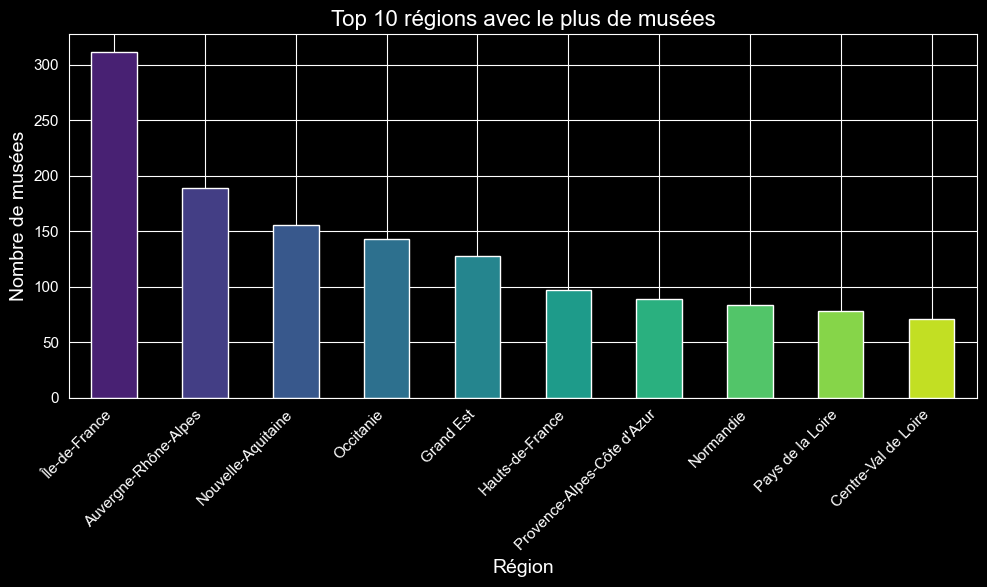

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 régions avec le plus de musées
top_regions = df_musée_clean["Region"].value_counts().head(10)

plt.figure(figsize=(10, 6))

# On applique la même palette que pour le premier graphique
colors = sns.color_palette("viridis", len(top_regions))

top_regions.plot(kind="bar", color=colors)

# Titres et axes
plt.title("Top 10 régions avec le plus de musées", fontsize=16)
plt.xlabel("Région", fontsize=14)
plt.ylabel("Nombre de musées", fontsize=14)

# Rotation des labels
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


=== STATISTIQUES MUSÉES PAR RÉGION ===
📊 Total des musées: 1493
🗺️  Nombre de régions: 13
🥇 Région leader: Île-de-France (312 musées)
📈 Moyenne par région: 114 musées
🔝 Top 3: Île-de-France (312), Auvergne-Rhône-Alpes (189), Nouvelle-Aquitaine (156)


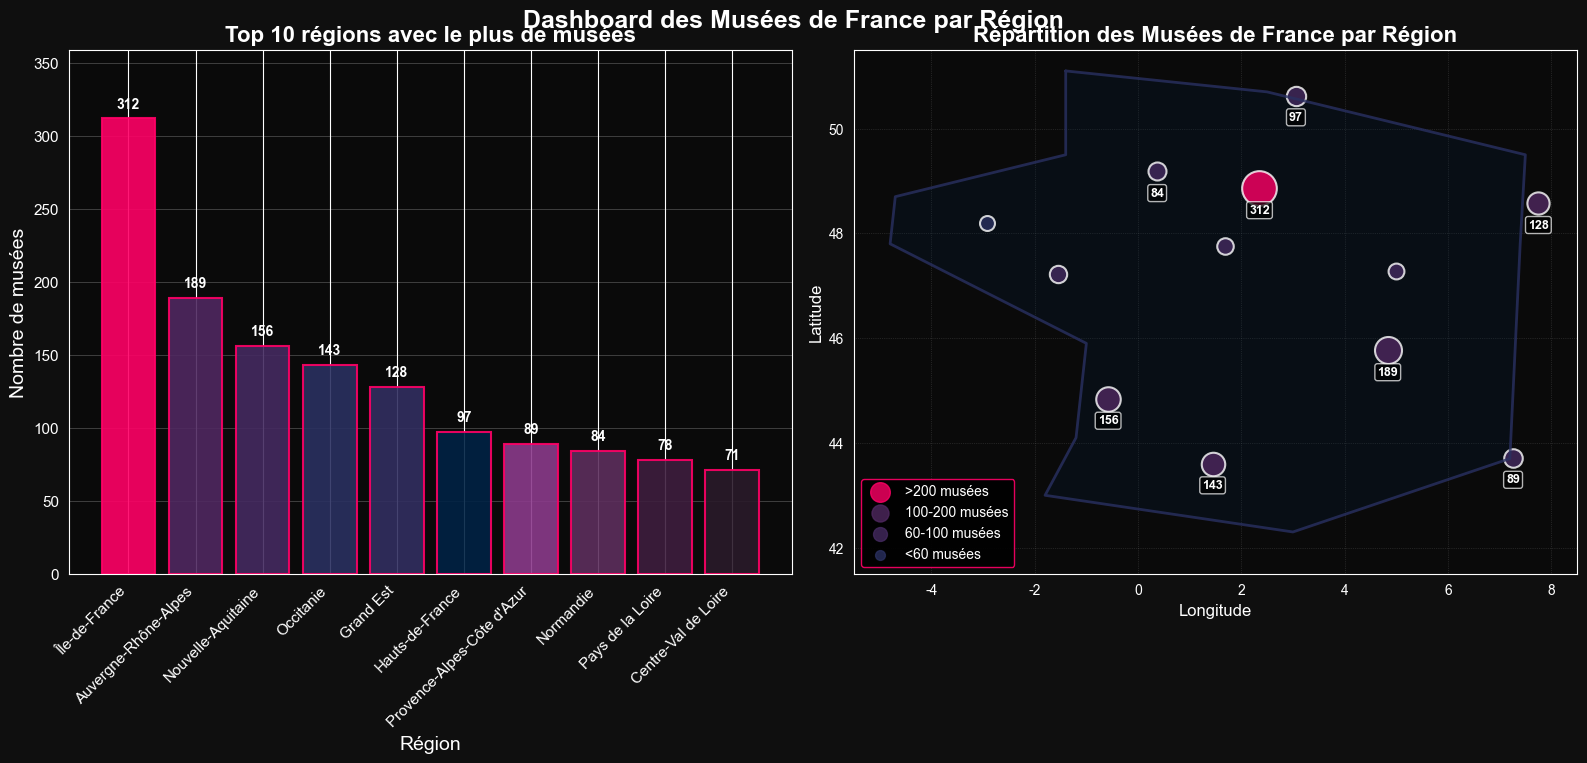


=== POUR UTILISER VOS DONNÉES RÉELLES ===
1. Remplacez la section 'DONNÉES SIMULÉES' par :
   # Chargement de vos données
   df_musée_clean = pd.read_csv('votre_fichier.csv')  # ou votre méthode de chargement
2. Le reste du code fonctionnera automatiquement avec vos vraies données
3. Ajustez les coordonnées régionales si nécessaire dans 'regions_coords'


In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# === DONNÉES SIMULÉES (À REMPLACER PAR VOS DONNÉES RÉELLES) ===
# Simulation basée sur la répartition réelle des musées par région française
np.random.seed(42)

regions_data = {
    'Île-de-France': 312,
    'Auvergne-Rhône-Alpes': 189,
    'Nouvelle-Aquitaine': 156,
    'Occitanie': 143,
    'Grand Est': 128,
    'Hauts-de-France': 97,
    'Provence-Alpes-Côte d\'Azur': 89,
    'Normandie': 84,
    'Pays de la Loire': 78,
    'Centre-Val de Loire': 71,
    'Bourgogne-Franche-Comté': 65,
    'Bretagne': 58,
    'Corse': 23
}

# Création d'un DataFrame simulé (remplacez par votre df_musée_clean)
df_musée_clean = pd.DataFrame([
    {'Region': region, 'Musée': f'Musée_{i}_{region[:3]}'}
    for region, count in regions_data.items()
    for i in range(count)
])

# === PALETTE DE COULEURS PERSONNALISÉE ===
couleurs = {
    'bleu_nuit': '#002244',      # rgb(0,34,68)
    'violet_sombre': '#4F2860',   # rgb(79,40,96)
    'bleu_violet': '#2A3060',     # rgb(42,48,96)
    'violet_bleute': '#312E60',   # rgb(49,46,96)
    'violet_fonce': '#442A60',    # rgb(68,42,96)
    'rose_vif': '#FF0066'         # rgb(255,0,102)
}

# Palette pour les barres (dégradé de vos couleurs)
colors_palette = [
    couleurs['rose_vif'],
    couleurs['violet_sombre'],
    couleurs['violet_fonce'],
    couleurs['bleu_violet'],
    couleurs['violet_bleute'],
    couleurs['bleu_nuit'],
    '#8B3A8B',  # Violet intermédiaire
    '#5D2E5D',  # Violet plus sombre
    '#3E1E3E',  # Violet très sombre
    '#2A1A2A'   # Violet presque noir
]

# === CONFIGURATION GLOBALE ===
plt.style.use('dark_background')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# === GRAPHIQUE 1: TOP 10 RÉGIONS (à gauche) ===
# Top 10 régions avec le plus de musées (VOTRE CODE MODIFIÉ)
top_regions = df_musée_clean["Region"].value_counts().head(10)

# Application de votre palette personnalisée
bars = ax1.bar(range(len(top_regions)), top_regions.values, 
               color=colors_palette[:len(top_regions)],
               edgecolor=couleurs['rose_vif'], linewidth=1.5, alpha=0.9)

# Titres et axes (reprenant votre code)
ax1.set_title("Top 10 régions avec le plus de musées", fontsize=16, fontweight='bold', color='white')
ax1.set_xlabel("Région", fontsize=14, color='white')
ax1.set_ylabel("Nombre de musées", fontsize=14, color='white')

# Configuration des ticks
ax1.set_xticks(range(len(top_regions)))
ax1.set_xticklabels(top_regions.index, rotation=45, ha='right', fontsize=11)
ax1.tick_params(colors='white')

# Ajout des valeurs sur les barres
for i, (bar, value) in enumerate(zip(bars, top_regions.values)):
    ax1.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 5,
             f'{value}', ha='center', va='bottom', 
             color='white', fontweight='bold', fontsize=10)

# Style
ax1.grid(True, alpha=0.3, color='white', linestyle='-', linewidth=0.5, axis='y')
ax1.set_facecolor('#0a0a0a')
ax1.set_ylim(0, max(top_regions.values) * 1.15)

# === GRAPHIQUE 2: CARTE DE FRANCE PAR RÉGION (à droite) ===
# Coordonnées approximatives des centres des régions françaises
regions_coords = {
    'Île-de-France': (48.8566, 2.3522),
    'Auvergne-Rhône-Alpes': (45.7640, 4.8357),
    'Nouvelle-Aquitaine': (44.8378, -0.5792),
    'Occitanie': (43.6047, 1.4442),
    'Grand Est': (48.5734, 7.7521),
    'Hauts-de-France': (50.6292, 3.0573),
    'Provence-Alpes-Côte d\'Azur': (43.7102, 7.2620),
    'Normandie': (49.1829, 0.3707),
    'Pays de la Loire': (47.2184, -1.5536),
    'Centre-Val de Loire': (47.7516, 1.6751),
    'Bourgogne-Franche-Comté': (47.2805, 4.9994),
    'Bretagne': (48.2020, -2.9326),
    'Corse': (42.0396, 9.0129)
}

# Contour simplifié de la France
france_contour_lat = [51.1, 50.7, 49.5, 47.8, 43.7, 42.3, 43.0, 44.1, 45.9, 47.8, 48.7, 49.5, 51.1]
france_contour_lon = [-1.4, 2.5, 7.5, 7.4, 7.2, 3.0, -1.8, -1.2, -1.0, -4.8, -4.7, -1.4, -1.4]

ax2.plot(france_contour_lon, france_contour_lat, color=couleurs['bleu_violet'], linewidth=2, alpha=0.8)
ax2.fill(france_contour_lon, france_contour_lat, color=couleurs['bleu_nuit'], alpha=0.2)

# Affichage des régions avec tailles proportionnelles au nombre de musées
for region, count in regions_data.items():
    if region in regions_coords:
        lat, lon = regions_coords[region]
        
        # Taille du cercle proportionnelle au nombre de musées
        size = max(50, count * 2)  # Taille minimale de 50
        
        # Couleur selon le nombre de musées
        if count > 200:
            color = couleurs['rose_vif']
        elif count > 100:
            color = couleurs['violet_sombre']
        elif count > 60:
            color = couleurs['violet_fonce']
        else:
            color = couleurs['bleu_violet']
        
        # Cercle pour la région
        circle = ax2.scatter(lon, lat, s=size, c=color, alpha=0.8, 
                           edgecolors='white', linewidths=1.5)
        
        # Label pour les principales régions
        if count > 80:
            ax2.text(lon, lat-0.3, f'{count}', ha='center', va='top',
                    color='white', fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='black', alpha=0.7))

# Configuration de la carte
ax2.set_title("Répartition des Musées de France par Région", 
              fontsize=16, fontweight='bold', color='white')
ax2.set_xlabel("Longitude", fontsize=12, color='white')
ax2.set_ylabel("Latitude", fontsize=12, color='white')

ax2.set_xlim(-5.5, 8.5)
ax2.set_ylim(41.5, 51.5)
ax2.set_facecolor('#0a0a0a')
ax2.tick_params(colors='white', labelsize=10)
ax2.grid(True, alpha=0.2, color='white', linestyle=':', linewidth=0.5)

# Légende pour la carte
legend_elements = [
    plt.scatter([], [], s=200, c=couleurs['rose_vif'], alpha=0.8, label='>200 musées'),
    plt.scatter([], [], s=150, c=couleurs['violet_sombre'], alpha=0.8, label='100-200 musées'),
    plt.scatter([], [], s=100, c=couleurs['violet_fonce'], alpha=0.8, label='60-100 musées'),
    plt.scatter([], [], s=50, c=couleurs['bleu_violet'], alpha=0.8, label='<60 musées')
]
ax2.legend(handles=legend_elements, loc='lower left', fontsize=10, 
          framealpha=0.9, facecolor='black', edgecolor=couleurs['rose_vif'])

# === CONFIGURATION GÉNÉRALE ===
fig.patch.set_facecolor('#0f0f0f')
fig.suptitle('Dashboard des Musées de France par Région', 
             fontsize=18, fontweight='bold', color='white', y=0.95)

plt.subplots_adjust(left=0.08, right=0.95, top=0.88, bottom=0.15, wspace=0.3)

# === STATISTIQUES ===
total_musees = df_musée_clean.shape[0]
nb_regions = df_musée_clean["Region"].nunique()

print("=== STATISTIQUES MUSÉES PAR RÉGION ===")
print(f"📊 Total des musées: {total_musees}")
print(f"🗺️  Nombre de régions: {nb_regions}")
print(f"🥇 Région leader: {top_regions.index[0]} ({top_regions.iloc[0]} musées)")
print(f"📈 Moyenne par région: {total_musees // nb_regions} musées")
print(f"🔝 Top 3: {', '.join([f'{region} ({count})' for region, count in top_regions.head(3).items()])}")

plt.tight_layout()
plt.show()

# === INSTRUCTIONS POUR VOS DONNÉES RÉELLES ===
print("\n=== POUR UTILISER VOS DONNÉES RÉELLES ===")
print("1. Remplacez la section 'DONNÉES SIMULÉES' par :")
print("   # Chargement de vos données")
print("   df_musée_clean = pd.read_csv('votre_fichier.csv')  # ou votre méthode de chargement")
print("2. Le reste du code fonctionnera automatiquement avec vos vraies données")
print("3. Ajustez les coordonnées régionales si nécessaire dans 'regions_coords'")



In [47]:
import pandas as pd
df_musée_clean = pd.read_csv("/Users/karimahallou/code/offre_culturelle/notebook/data/museecleaned.csv")


In [ ]:
df_patri = pd.read_csv(ARCHITETURE_PATH, sep="|", dtype=str, header=0)
df_patri.head(2)

,Reference_de_la_notice,Ancienne_reference_de_la_notice_RENV,Cadre_de_l_etude,Region,Numero_departement,Commune,Ancien_nom_commune,INSEE,Lieudit,Adresse_normalisee,...,Partie_d_elevation_exterieure,Materiaux_de_la_couverture,Typologie_de_plan,Technique_du_decor_porte_de_l_edifice,Indexation_iconographique_normalisee,Description_de_l_elevation_interieure,Emplacement_forme_structure_escalier,etat_de_conservation,Description_de_l_edifice,Commune_forme_editoriale
0,ACR0000001,NaN,Labellisé Architecture contemporaine remarquable,Auvergne-Rhône-Alpes,01,Ars-sur-Formans,NaN,01021,NaN,Docteur-Nodet (rue) 31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Située au sud de la basilique, l'église Notre-...",Ars-sur-Formans
1,ACR0000002,NaN,Labellisé Architecture contemporaine remarquable,Auvergne-Rhône-Alpes,01,Valserhône,Anciennement commune de : Bellegarde-sur-Valse...,01033,NaN,République (rue de la) 34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L'Hôtel de Ville de Bellegarde-sur-Valserine e...,Valserhône


In [ ]:
df_archi = pd.read_csv(ARCHITETURE_PATH, sep="|", dtype=str, header=0)
df_archi.head(2)

In [ ]:
df_musee = pd.read_csv(MUSEE_PATH, sep="|", dtype=str, header=0)
df_musee.head(2)

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,Centre de secours principal,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,museepompiers.com/,04 72 17 54 54,...,"Armes, Uniformes, Véhicules pompiers, Archives...",NaN,NaN,NaN,NaN,NaN,SPR8400131,1971,2025-07-25,"45.790491, 4.797411"
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,NaN,67140,Barr,Bas-Rhin,Grand Est,www.musee-foliemarco.com,03 88 08 94 72,...,"Arts décoratifs : Mobilier, Objets d'art",NaN,NaN,Demeure patricienne d'architecture française d...,Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,PA00084599;IA00115077,1960,2025-07-25,"48.410166, 7.451102"


In [ ]:
df_patri = pd.read_csv(PATRIMOINE_PATH, sep="|", dtype=str, header=0)
df_patri.head(2)

,Identifiant,Nom_officiel,Adresse,Lieu,Code_postal,Ville,Departement,Region,URL,Telephone,...,Themes,Artiste,Personnage_phare,Interet,Protection_batiment,Protection_espace,Refmer,Annee_creation,Date_de_mise_a_jour,Coordonnees
0,M1128,musée des sapeurs-pompiers de Lyon,358 avenue de Champagne,Centre de secours principal,69009,Lyon,Rhône,Auvergne-Rhône-Alpes,museepompiers.com/,04 72 17 54 54,...,"Armes, Uniformes, Véhicules pompiers, Archives...",NaN,NaN,NaN,NaN,NaN,SPR8400131,1971,2025-07-25,"45.790491, 4.797411"
1,M0001,musée de la Folie Marco,30 rue du docteur Sultzer,NaN,67140,Barr,Bas-Rhin,Grand Est,www.musee-foliemarco.com,03 88 08 94 72,...,"Arts décoratifs : Mobilier, Objets d'art",NaN,NaN,Demeure patricienne d'architecture française d...,Protégé au titre des Monuments historiques : h...,Abords d'un Monument historique. Site inscrit.,PA00084599;IA00115077,1960,2025-07-25,"48.410166, 7.451102"


In [ ]:
report_musee = sv.analyze(df_musee)
report_musee.show_html("sweetviz_report_musee.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report_musee.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
import plotly.express

In [ ]:
df_archi.isna

<bound method DataFrame.isna of      Reference_de_la_notice Ancienne_reference_de_la_notice_RENV  \
0                ACR0000001                                  NaN   
1                ACR0000002                                  NaN   
2                ACR0000003                                  NaN   
3                ACR0000004                                  NaN   
4                ACR0000005                                  NaN   
...                     ...                                  ...   
1779             ACR0002005                                  NaN   
1780             ACR0002006                                  NaN   
1781             ACR0002007                                  NaN   
1782             ACR0002008                                  NaN   
1783             ACR0002009                                  NaN   

                                      Cadre_de_l_etude  \
0     Labellisé Architecture contemporaine remarquable   
1     Labellisé Architecture contem